<h1 align="center"><b>🌋 EARTHQUAKE DAMAGE LEVEL PREDICTION USING MACHINE LEARNING CLASSIFICATION MODELS 🌋</b></h1>
<p align="center"><i>
BY: Abisha C
</i></p>




#PROBLEM STATEMENT
Earthquakes cause varying levels of structural damage to buildings depending on their design, materials, age, and geographical location. Accurately predicting the severity of this damage is crucial for disaster response planning, resource allocation, and improving building safety standards. Using detailed building survey data from the 2015 Gorkha Earthquake in Nepal, the objective of this project is to develop a machine learning model that classifies buildings into three damage levels—low, medium, and severe—based on structural, geographical, and ownership features. This predictive model will support authorities and engineers in assessing risk and prioritizing reconstruction efforts.

#DATASET DESCRIPTION

### **Target Variable**

We are predicting the ordinal variable **damage_grade**, which represents the level of building damage caused by the Gorkha earthquake:

* **1 = Low damage**
* **2 = Medium damage**
* **3 = Almost complete destruction**

---

## **Dataset Overview**

* Each row represents one building affected by the earthquake.
* The dataset contains **39 columns**:

  * **building_id** → unique identifier
  * **38 features** describing structure, location, ownership, and usage
* Categorical values are anonymized using random lowercase letters.

---

## **Feature Descriptions**

### **Geographic Features**

* geo_level_1_id (int): Region ID (0–30)
* geo_level_2_id (int): Sub-region ID (0–1427)
* geo_level_3_id (int): Detailed region ID (0–12567)

### **Structural Features**

* count_floors_pre_eq (int): Number of floors before earthquake
* age (int): Age of building
* area_percentage (int): Normalized building footprint area
* height_percentage (int): Normalized building height

### **Land & Construction**

* land_surface_condition (categorical): n, o, t
* foundation_type (categorical): h, i, r, u, w
* roof_type (categorical): n, q, x
* ground_floor_type (categorical): f, m, v, x, z
* other_floor_type (categorical): j, q, s, x
* position (categorical): j, o, s, t
* plan_configuration (categorical): a, c, d, f, m, n, o, q, s, u

### **Superstructure Materials (Binary Flags: 0/1)**

* has_superstructure_adobe_mud
* has_superstructure_mud_mortar_stone
* has_superstructure_stone_flag
* has_superstructure_cement_mortar_stone
* has_superstructure_mud_mortar_brick
* has_superstructure_cement_mortar_brick
* has_superstructure_timber
* has_superstructure_bamboo
* has_superstructure_rc_non_engineered
* has_superstructure_rc_engineered
* has_superstructure_other

### **Ownership & Usage**

* legal_ownership_status (categorical): a, r, v, w
* count_families (int): Number of families in building
* has_secondary_use (binary): Building has secondary use?

### **Secondary Use Indicators (Binary)**

* has_secondary_use_agriculture
* has_secondary_use_hotel
* has_secondary_use_rental
* has_secondary_use_institution
* has_secondary_use_school
* has_secondary_use_industry
* has_secondary_use_health_post
* has_secondary_use_gov_office
* has_secondary_use_use_police
* has_secondary_use_other



 # 1) IMPORTING REQUIRED LIBRARIES




In [ ]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 9.3 MB/s eta 0:00:00


In [ ]:
import os# Import OS to control system-level settings
os.environ['OMP_NUM_THREADS'] = "1"# Limit the number of CPU threads (helps reduce lag in Google Colab)
seed=42# Set a seed value to make results repeatable

In [ ]:
import gc
import warnings
warnings.filterwarnings('ignore')

# DATA HANDLING

import pandas as pd
import numpy as np


# VISUALIZATION

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')


#  PREPROCESSING

from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.preprocessing import label_binarize
from sklearn.impute import SimpleImputer


# METRICS

from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    accuracy_score,
    f1_score,
    roc_curve,
    auc
)

# MODELS

from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier


# STATISTICAL TOOLS

from statsmodels.stats.outliers_influence import variance_inflation_factor


# IMBALANCED DATA

from imblearn.over_sampling import SMOTE


# 2) LOADING THE DATASET

In [ ]:
# Load the input features dataset
values = pd.read_csv("train_values.csv")


# Load the target labels dataset
labels = pd.read_csv("train_labels.csv")

In [ ]:
values

building_id  geo_level_1_id  geo_level_2_id  geo_level_3_id  \
0            802906               6             487           12198   
1             28830               8             900            2812   
2             94947              21             363            8973   
3            590882              22             418           10694   
4            201944              11             131            1488   
...             ...             ...             ...             ...   
260596       688636              25            1335            1621   
260597       669485              17             715            2060   
260598       602512              17              51            8163   
260599       151409              26              39            1851   
260600       747594              21               9            9101   

        count_floors_pre_eq  age  area_percentage  height_percentage  \
0                         2   30                6                  5   
1                         2   10                8                  7   
2                         2   10                5                  5   
3                         2   10                6                  5   
4                         3   30                8                  9   
...                     ...  ...              ...                ...   
260596                    1   55                6                  3   
260597                    2    0                6                  5   
260598                    3   55                6                  7   
260599                    2   10               14                  6   
260600                    3   10                7                  6   

       land_surface_condition foundation_type  ...  \
0                           t               r  ...   
1                           o               r  ...   
2                           t               r  ...   
3                           t               r  ...   
4                           t               r  ...   
...                       ...             ...  ...   
260596                      n               r  ...   
260597                      t               r  ...   
260598                      t               r  ...   
260599                      t               r  ...   
260600                      n               r  ...   

       has_secondary_use_agriculture has_secondary_use_hotel  \
0                                  0                       0   
1                                  0                       0   
2                                  0                       0   
3                                  0                       0   
4                                  0                       0   
...                              ...                     ...   
260596                             0                       0   
260597                             0                       0   
260598                             0                       0   
260599                             0                       0   
260600                             0                       0   

       has_secondary_use_rental has_secondary_use_institution  \
0                             0                             0   
1                             0                             0   
2                             0                             0   
3                             0                             0   
4                             0                             0   
...                         ...                           ...   
260596                        0                             0   
260597                        0                             0   
260598                        0                             0   
260599                        0                             0   
260600                        0                             0   

       has_secondary_use_school  has_secondary_use_industry  \
0                           

In [ ]:
labels

building_id  damage_grade
0            802906             3
1             28830             2
2             94947             3
3            590882             2
4            201944             3
...             ...           ...
260596       688636             2
260597       669485             3
260598       602512             3
260599       151409             2
260600       747594             3

[260601 rows x 2 columns]

In [ ]:
values.shape

(260601, 39)

In [ ]:
labels.shape

(260601, 2)

#3) DROPPING UNNECESSARY COLUMNS


In [ ]:
# Drop building_id because it is only an identification number
# and does not help in predicting earthquake damage
values = values.drop('building_id', axis=1)
labels = labels.drop('building_id', axis=1)


In [ ]:
# concatenate input and output features
df=pd.concat([values,labels],axis=1)

#why we concatenate?
Because machine learning needs features and target to be together during preprocessing and EDA.

In [ ]:
df

geo_level_1_id  geo_level_2_id  geo_level_3_id  count_floors_pre_eq  \
0                    6             487           12198                    2   
1                    8             900            2812                    2   
2                   21             363            8973                    2   
3                   22             418           10694                    2   
4                   11             131            1488                    3   
...                ...             ...             ...                  ...   
260596              25            1335            1621                    1   
260597              17             715            2060                    2   
260598              17              51            8163                    3   
260599              26              39            1851                    2   
260600              21               9            9101                    3   

        age  area_percentage  height_percentage land_surface_condition  \
0        30                6                  5                      t   
1        10                8                  7                      o   
2        10                5                  5                      t   
3        10                6                  5                      t   
4        30                8                  9                      t   
...     ...              ...                ...                    ...   
260596   55                6                  3                      n   
260597    0                6                  5                      t   
260598   55                6                  7                      t   
260599   10               14                  6                      t   
260600   10                7                  6                      n   

       foundation_type roof_type  ... has_secondary_use_hotel  \
0                    r         n  ...                       0   
1                    r         n  ...                       0   
2                    r         n  ...                       0   
3                    r         n  ...                       0   
4                    r         n  ...                       0   
...                ...       ...  ...                     ...   
260596               r         n  ...                       0   
260597               r         n  ...                       0   
260598               r         q  ...                       0   
260599               r         x  ...                       0   
260600               r         n  ...                       0   

       has_secondary_use_rental has_secondary_use_institution  \
0                             0                             0   
1                             0                             0   
2                             0                             0   
3                             0                             0   
4                             0                             0   
...                         ...                           ...   
260596                        0                             0   
260597                        0                             0   
260598                        0                             0   
260599                        0                             0   
260600                        0                             0   

       has_secondary_use_school  has_secondary_use_industry  \
0                             0                           0   
1                             0                           0   
2                             0                           0   
3                             0                           0   
4                             0                           0   
...                         ...                         ...   
260596                        0                           0   
260597                        0                           0   
260598                        0          

In [ ]:
df.head()

geo_level_1_id  geo_level_2_id  geo_level_3_id  count_floors_pre_eq  age  \
0               6             487           12198                    2   30   
1               8             900            2812                    2   10   
2              21             363            8973                    2   10   
3              22             418           10694                    2   10   
4              11             131            1488                    3   30   

   area_percentage  height_percentage land_surface_condition foundation_type  \
0                6                  5                      t               r   
1                8                  7                      o               r   
2                5                  5                      t               r   
3                6                  5                      t               r   
4                8                  9                      t               r   

  roof_type  ... has_secondary_use_hotel has_secondary_use_rental  \
0         n  ...                       0                        0   
1         n  ...                       0                        0   
2         n  ...                       0                        0   
3         n  ...                       0                        0   
4         n  ...                       0                        0   

  has_secondary_use_institution has_secondary_use_school  \
0                             0                        0   
1                             0                        0   
2                             0                        0   
3                             0                        0   
4                             0                        0   

   has_secondary_use_industry  has_secondary_use_health_post  \
0                           0                              0   
1                           0                              0   
2                           0                              0   
3                           0                              0   
4                           0                              0   

   has_secondary_use_gov_office  has_secondary_use_use_police  \
0                             0                             0   
1                             0                             0   
2                             0                             0   
3                             0                             0   
4                             0                             0   

   has_secondary_use_other  damage_grade  
0                        0             3  
1                        0             2  
2                        0             3  
3                        0             2  
4                        0             3  

[5 rows x 39 columns]

In [ ]:
df.tail()

geo_level_1_id  geo_level_2_id  geo_level_3_id  count_floors_pre_eq  \
260596              25            1335            1621                    1   
260597              17             715            2060                    2   
260598              17              51            8163                    3   
260599              26              39            1851                    2   
260600              21               9            9101                    3   

        age  area_percentage  height_percentage land_surface_condition  \
260596   55                6                  3                      n   
260597    0                6                  5                      t   
260598   55                6                  7                      t   
260599   10               14                  6                      t   
260600   10                7                  6                      n   

       foundation_type roof_type  ... has_secondary_use_hotel  \
260596               r         n  ...                       0   
260597               r         n  ...                       0   
260598               r         q  ...                       0   
260599               r         x  ...                       0   
260600               r         n  ...                       0   

       has_secondary_use_rental has_secondary_use_institution  \
260596                        0                             0   
260597                        0                             0   
260598                        0                             0   
260599                        0                             0   
260600                        0                             0   

       has_secondary_use_school  has_secondary_use_industry  \
260596                        0                           0   
260597                        0                           0   
260598                        0                           0   
260599                        0                           0   
260600                        0                           0   

        has_secondary_use_health_post  has_secondary_use_gov_office  \
260596                              0                             0   
260597                              0                             0   
260598                              0                             0   
260599                              0                             0   
260600                              0                             0   

        has_secondary_use_use_police  has_secondary_use_other  damage_grade  
260596                             0                        0             2  
260597                             0                        0             3  
260598                             0                        0             3  
260599                             0                        0             2  
260600                             0                        0             3  

[5 rows x 39 columns]

In [ ]:
df.shape

(260601, 39)

In [ ]:
df.columns

Index(['geo_level_1_id', 'geo_level_2_id', 'geo_level_3_id',
       'count_floors_pre_eq', 'age', 'area_percentage', 'height_percentage',
       'land_surface_condition', 'foundation_type', 'roof_type',
       'ground_floor_type', 'other_floor_type', 'position',
       'plan_configuration', 'has_superstructure_adobe_mud',
       'has_superstructure_mud_mortar_stone', 'has_superstructure_stone_flag',
       'has_superstructure_cement_mortar_stone',
       'has_superstructure_mud_mortar_brick',
       'has_superstructure_cement_mortar_brick', 'has_superstructure_timber',
       'has_superstructure_bamboo', 'has_superstructure_rc_non_engineered',
       'has_superstructure_rc_engineered', 'has_superstructure_other',
       'legal_ownership_status', 'count_families', 'has_secondary_use',
       'has_secondary_use_agriculture', 'has_secondary_use_hotel',
       'has_secondary_use_rental', 'has_secondary_use_institution',
       'has_secondary_use_school', 'has_secondary_use_industry',
     

# 4) RENAMING COLUMNS FOR SIMPLICITY

In [ ]:
# column names are too big so we shorten them by renaming
rename_dict = {
    'geo_level_1_id': 'geo1',
    'geo_level_2_id': 'geo2',
    'geo_level_3_id': 'geo3',
    'count_floors_pre_eq': 'floors',
    'age': 'age',
    'area_percentage': 'area_pct',
    'height_percentage': 'height_pct',
    'land_surface_condition': 'land_cond',
    'foundation_type': 'foundation',
    'roof_type': 'roof',
    'ground_floor_type': 'ground_floor',
    'other_floor_type': 'other_floor',
    'position': 'position',
    'plan_configuration': 'plan_config',
    'has_superstructure_adobe_mud': 'sup_adobe',
    'has_superstructure_mud_mortar_stone': 'sup_mud_stone',
    'has_superstructure_stone_flag': 'sup_stone',
    'has_superstructure_cement_mortar_stone': 'sup_cement_stone',
    'has_superstructure_mud_mortar_brick': 'sup_mud_brick',
    'has_superstructure_cement_mortar_brick': 'sup_cement_brick',
    'has_superstructure_timber': 'sup_timber',
    'has_superstructure_bamboo': 'sup_bamboo',
    'has_superstructure_rc_non_engineered': 'sup_rc_non_eng',
    'has_superstructure_rc_engineered': 'sup_rc_eng',
    'has_superstructure_other': 'sup_other',
    'legal_ownership_status': 'ownership',
    'count_families': 'families',
    'has_secondary_use': 'sec_use',
    'has_secondary_use_agriculture': 'sec_agriculture',
    'has_secondary_use_hotel': 'sec_hotel',
    'has_secondary_use_rental': 'sec_rental',
    'has_secondary_use_institution': 'sec_institution',
    'has_secondary_use_school': 'sec_school',
    'has_secondary_use_industry': 'sec_industry',
    'has_secondary_use_health_post': 'sec_health',
    'has_secondary_use_gov_office': 'sec_gov',
    'has_secondary_use_use_police': 'sec_police',
    'has_secondary_use_other': 'sec_other',
    'damage_grade': 'damage'
}

# Apply renaming
df = df.rename(columns=rename_dict)

In [ ]:
df.columns

Index(['geo1', 'geo2', 'geo3', 'floors', 'age', 'area_pct', 'height_pct',
       'land_cond', 'foundation', 'roof', 'ground_floor', 'other_floor',
       'position', 'plan_config', 'sup_adobe', 'sup_mud_stone', 'sup_stone',
       'sup_cement_stone', 'sup_mud_brick', 'sup_cement_brick', 'sup_timber',
       'sup_bamboo', 'sup_rc_non_eng', 'sup_rc_eng', 'sup_other', 'ownership',
       'families', 'sec_use', 'sec_agriculture', 'sec_hotel', 'sec_rental',
       'sec_institution', 'sec_school', 'sec_industry', 'sec_health',
       'sec_gov', 'sec_police', 'sec_other', 'damage'],
      dtype='object')

In [ ]:
df.dtypes

geo1                 int64
geo2                 int64
geo3                 int64
floors               int64
age                  int64
area_pct             int64
height_pct           int64
land_cond           object
foundation          object
roof                object
ground_floor        object
other_floor         object
position            object
plan_config         object
sup_adobe            int64
sup_mud_stone        int64
sup_stone            int64
sup_cement_stone     int64
sup_mud_brick        int64
sup_cement_brick     int64
sup_timber           int64
sup_bamboo           int64
sup_rc_non_eng       int64
sup_rc_eng           int64
sup_other            int64
ownership           object
families             int64
sec_use              int64
sec_agriculture      int64
sec_hotel            int64
sec_rental           int64
sec_institution      int64
sec_school           int64
sec_industry         int64
sec_health           int64
sec_gov              int64
sec_police           int64
sec_other            int64
damage               int64
dtype: object

# 5) EXPLORATORY DATA ANALYSIS (EDA)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260601 entries, 0 to 260600
Data columns (total 39 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   geo1              260601 non-null  int64 
 1   geo2              260601 non-null  int64 
 2   geo3              260601 non-null  int64 
 3   floors            260601 non-null  int64 
 4   age               260601 non-null  int64 
 5   area_pct          260601 non-null  int64 
 6   height_pct        260601 non-null  int64 
 7   land_cond         260601 non-null  object
 8   foundation        260601 non-null  object
 9   roof              260601 non-null  object
 10  ground_floor      260601 non-null  object
 11  other_floor       260601 non-null  object
 12  position          260601 non-null  object
 13  plan_config       260601 non-null  object
 14  sup_adobe         260601 non-null  int64 
 15  sup_mud_stone     260601 non-null  int64 
 16  sup_stone         260601 non-null  int

The dataset has 260,601 rows and 39 columns, meaning 260,601 buildings and 39 features.

Out of these, 31 columns are numbers and 8 columns are categories (object type).

There are no missing values, since every column shows “260601 non-null”.

In [ ]:
#prevent column truncation
pd.set_option('display.max_columns', None)


This line tells pandas to show all columns without cutting them off.


In [ ]:
#summary statistics for numerical columns
df.describe()

geo1           geo2           geo3         floors  \
count  260601.000000  260601.000000  260601.000000  260601.000000   
mean       13.900353     701.074685    6257.876148       2.129723   
std         8.033617     412.710734    3646.369645       0.727665   
min         0.000000       0.000000       0.000000       1.000000   
25%         7.000000     350.000000    3073.000000       2.000000   
50%        12.000000     702.000000    6270.000000       2.000000   
75%        21.000000    1050.000000    9412.000000       2.000000   
max        30.000000    1427.000000   12567.000000       9.000000   

                 age       area_pct     height_pct      sup_adobe  \
count  260601.000000  260601.000000  260601.000000  260601.000000   
mean       26.535029       8.018051       5.434365       0.088645   
std        73.565937       4.392231       1.918418       0.284231   
min         0.000000       1.000000       2.000000       0.000000   
25%        10.000000       5.000000       4.000000       0.000000   
50%        15.000000       7.000000       5.000000       0.000000   
75%        30.000000       9.000000       6.000000       0.000000   
max       995.000000     100.000000      32.000000       1.000000   

       sup_mud_stone      sup_stone  sup_cement_stone  sup_mud_brick  \
count  260601.000000  260601.000000     260601.000000  260601.000000   
mean        0.761935       0.034332          0.018235       0.068154   
std         0.425900       0.182081          0.133800       0.252010   
min         0.000000       0.000000          0.000000       0.000000   
25%         1.000000       0.000000          0.000000       0.000000   
50%         1.000000       0.000000          0.000000       0.000000   
75%         1.000000       0.000000          0.000000       0.000000   
max         1.000000       1.000000          1.000000       1.000000   

       sup_cement_brick     sup_timber     sup_bamboo  sup_rc_non_eng  \
count     260601.000000  260601.000000  260601.000000   260601.000000   
mean           0.075268       0.254988       0.085011        0.042590   
std            0.263824       0.435855       0.278899        0.201931   
min            0.000000       0.000000       0.000000        0.000000   
25%            0.000000       0.000000       0.000000        0.000000   
50%            0.000000       0.000000       0.000000        0.000000   
75%            0.000000       1.000000       0.000000        0.000000   
max            1.000000       1.000000       1.000000        1.000000   

          sup_rc_eng      sup_other       families        sec_use  \
count  260601.000000  260601.000000  260601.000000  260601.000000   
mean        0.015859       0.014985       0.983949       0.111880   
std         0.124932       0.121491       0.418389       0.315219   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       1.000000       0.000000   
50%         0.000000       0.000000       1.000000       0.000000   
75%         0.000000       0.000000       1.000000       0.000000   
max         1.000000       1.000000       9.000000       1.000000   

       sec_agriculture      sec_hotel     sec_rental  sec_institution  \
count    260601.000000  260601.000000  260601.000000    260601.000000   
mean          0.064378       0.033626       0.008101         0.000940   
std           0.245426       0.180265       0.089638         0.030647   
min           0.000000       0.000000       0.000000         0.000000   
25%           0.000000       0.000000       0.000000         0.000000   
50%           0.000000       0.000000       0.000000         0.000000   
75%           0.000000       0.000000       0.000000         0.000000   
max           1.000000       1.000000       1.000000         1.000000   

          sec_school   sec_industry     sec_health        sec_gov  \
count  260601.000000  260601.000000  260601.000000  260601.000000   
mean        0.000361       0.001071       0.000

Outliers are mainly present in age, area percentage, height percentage, and families.

In [ ]:
#summary statistics for categorical columns
df.describe(include="object").T

count unique top    freq
land_cond     260601      3   t  216757
foundation    260601      5   r  219196
roof          260601      3   n  182842
ground_floor  260601      5   f  209619
other_floor   260601      4   q  165282
position      260601      4   s  202090
plan_config   260601     10   d  250072
ownership     260601      4   v  250939

The categorical columns have no missing values. Most categories are highly imbalanced

In [ ]:
df.isnull().sum()

geo1                0
geo2                0
geo3                0
floors              0
age                 0
area_pct            0
height_pct          0
land_cond           0
foundation          0
roof                0
ground_floor        0
other_floor         0
position            0
plan_config         0
sup_adobe           0
sup_mud_stone       0
sup_stone           0
sup_cement_stone    0
sup_mud_brick       0
sup_cement_brick    0
sup_timber          0
sup_bamboo          0
sup_rc_non_eng      0
sup_rc_eng          0
sup_other           0
ownership           0
families            0
sec_use             0
sec_agriculture     0
sec_hotel           0
sec_rental          0
sec_institution     0
sec_school          0
sec_industry        0
sec_health          0
sec_gov             0
sec_police          0
sec_other           0
damage              0
dtype: int64

In [ ]:
#checks how many duplicate rows
df.duplicated().sum()

np.int64(12319)

In [ ]:
#removes all duplicate rows
df.drop_duplicates(inplace=True)

In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.shape

(248282, 39)

260,601 – 12,319 = 248,282
- Duplicate removal was successful
- Dataset is now clean
- Ready for further processing


([<matplotlib.patches.Wedge at 0x7b0745545340>,
 [Text(-1.0735531726897154, -0.23975734693194736, 'medium'),
  Text(1.0956075857879832, -0.09820396103939567, 'high'),
  Text(0.33464334351972186, 1.0478615522281278, 'low')],
 [Text(-0.5855744578307538, -0.13077673469015308, '56.99%'),
  Text(0.5976041377025363, -0.05356579693057945, '33.17%'),
  Text(0.1825327328289392, 0.5715608466698878, '9.84%')])

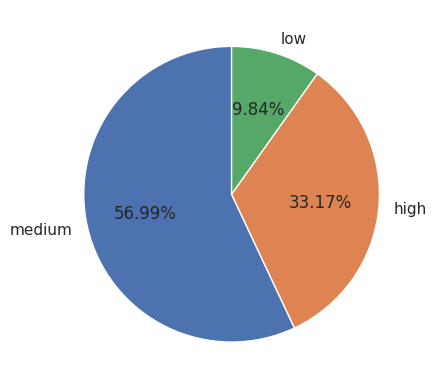

In [ ]:
#univariate (distribution of individual features)
#pie chart for target column
df['damage_label'] = df['damage'].map({1:'low', 2:'medium', 3:'high'})
damage_counts = df['damage_label'].value_counts()
plt.pie(damage_counts, labels=damage_counts.index, autopct='%1.2f%%', startangle=90)


The pie chart shows that most buildings fall under medium damage (57%), followed by high damage (33%). Low damage buildings are only around 10%, which means the dataset is imbalanced and needs SMOTE to balance the classes.

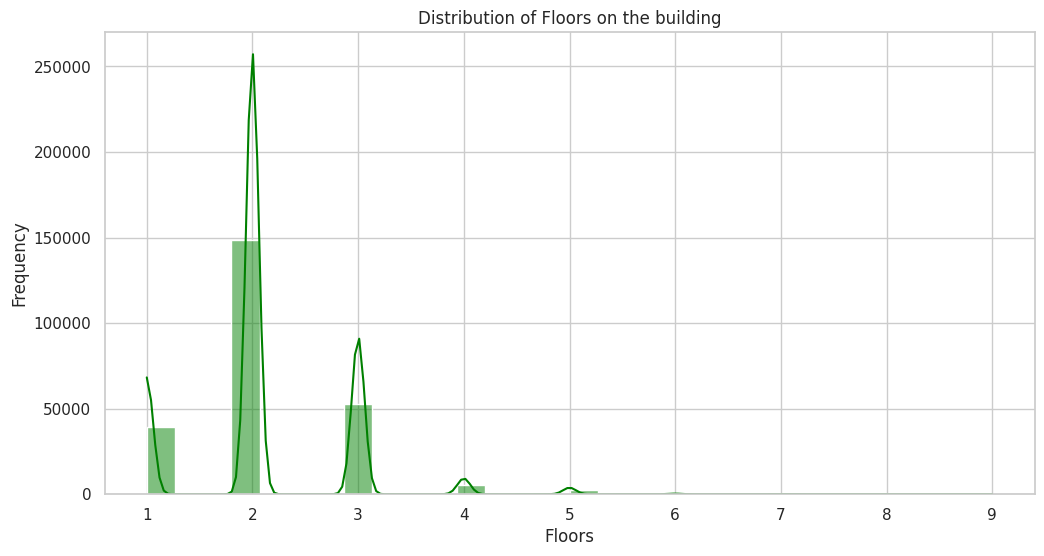

In [ ]:
# Plotting histogram to see how many floors most buildings have
plt.figure(figsize=(12,6))
sns.histplot(df["floors"], bins=30, kde=True, color="green")
plt.xlabel("Floors")
plt.ylabel("Frequency")
plt.title("Distribution of Floors on the building")
plt.show()


Most buildings have 2 floors

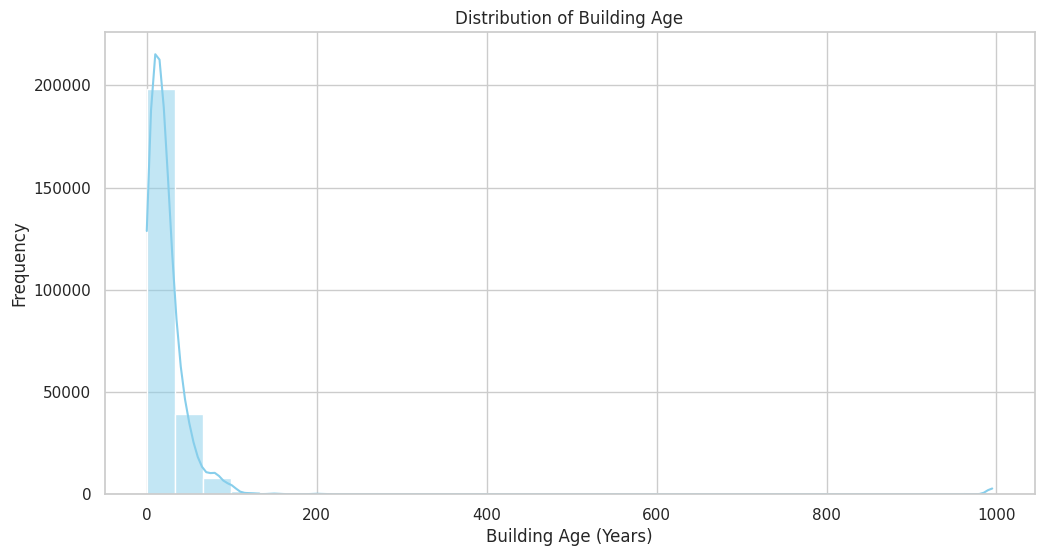

In [ ]:
# Plotting histogram to understand the age distribution of buildings
plt.figure(figsize=(12,6))
sns.histplot(df["age"], bins=30, kde=True, color="skyblue")
plt.xlabel("Building Age (Years)")
plt.ylabel("Frequency")
plt.title("Distribution of Building Age")
plt.show()

- Many buildings are between 0–30 years old.

- A few buildings are extremely old (close to 900 years!) → these are outliers.

- The age distribution is right-skewed, meaning more new buildings than old ones



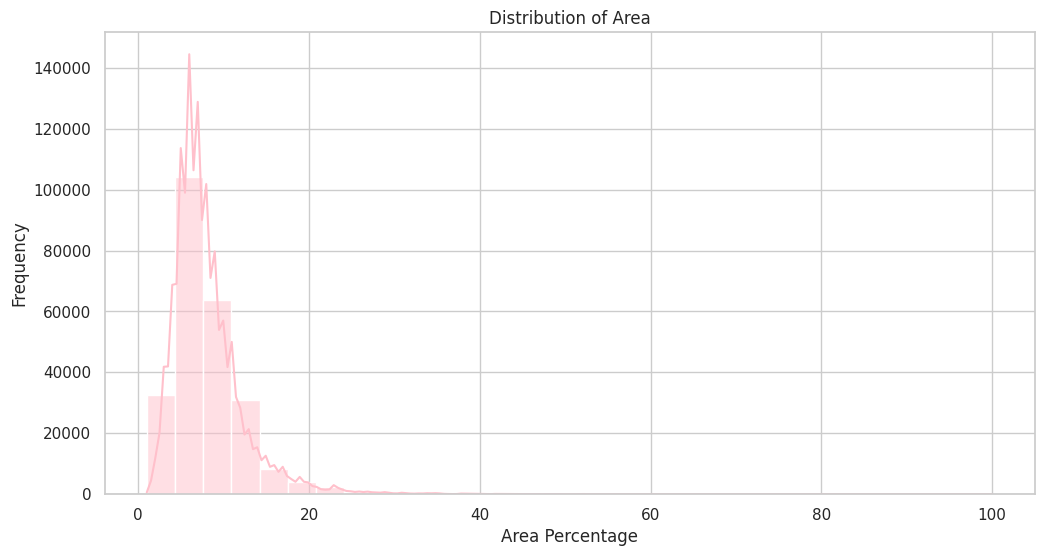

In [ ]:
# Plotting histogram to visualize the distribution of area percentage
plt.figure(figsize=(12,6))
sns.histplot(df["area_pct"], bins=30, kde=True, color="pink")
plt.xlabel("Area Percentage")
plt.ylabel("Frequency")
plt.title("Distribution of Area")
plt.show()

- Most buildings fall between 5% to 15% area percentage.

- Some buildings have very high area_pct values, which may be outliers.

- The distribution is somewhat right-skewed, meaning a few buildings occupy very large area percentages.

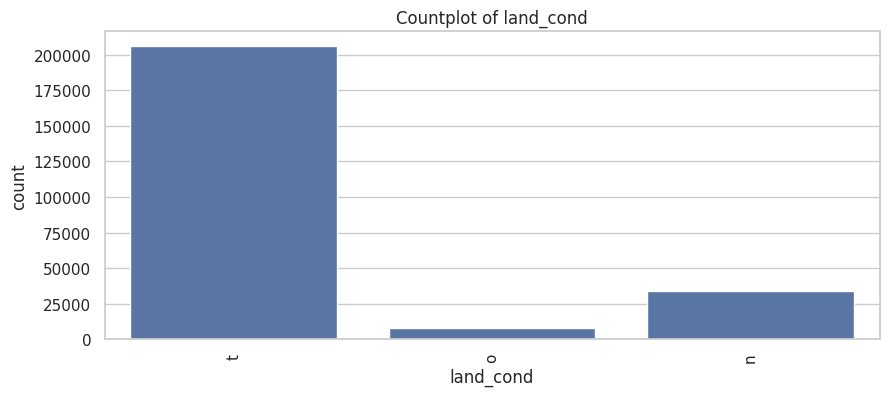

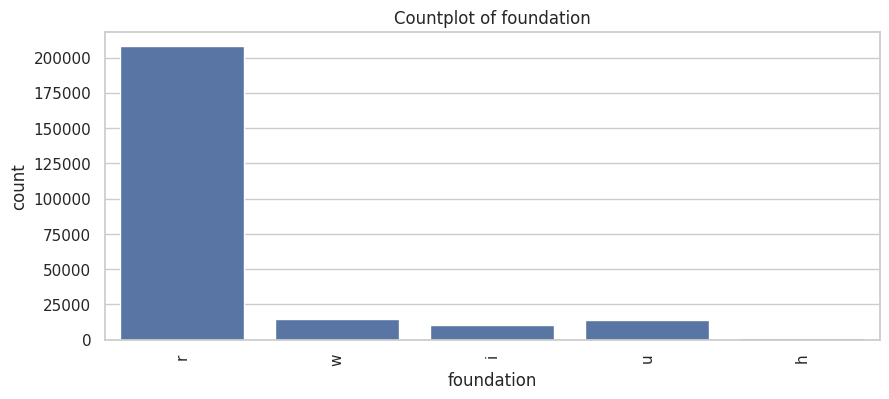

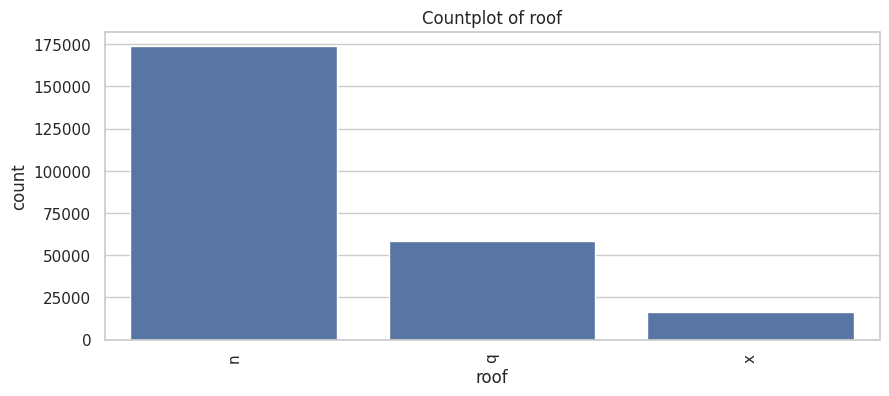

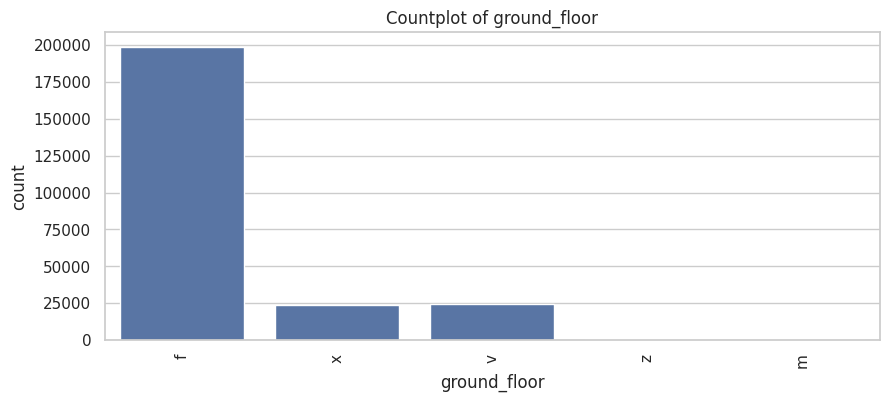

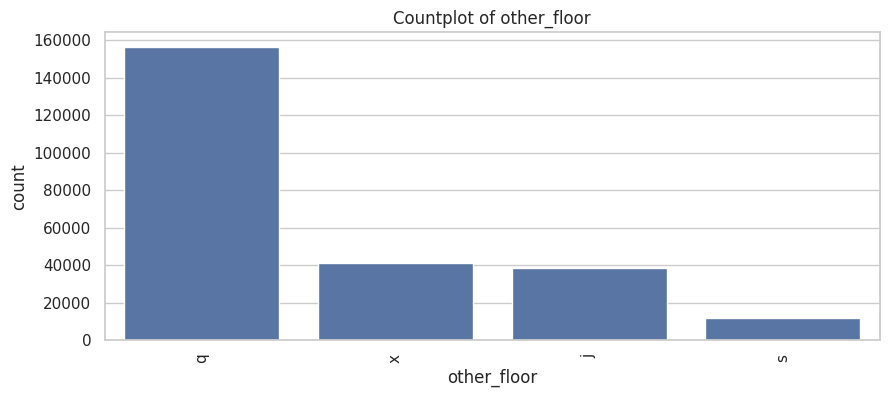

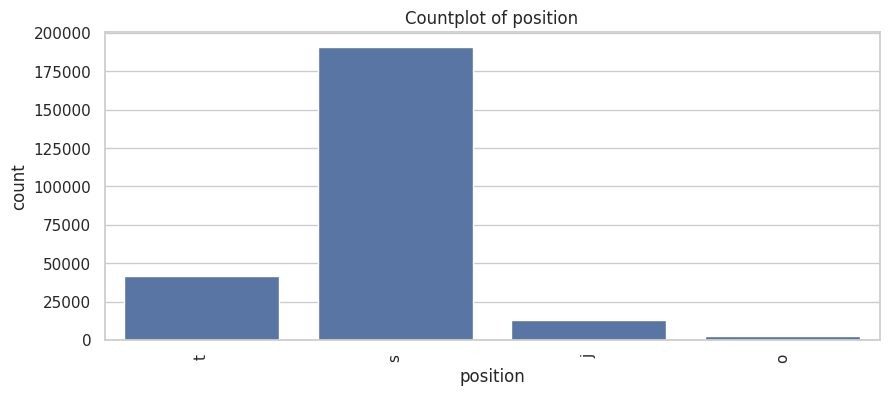

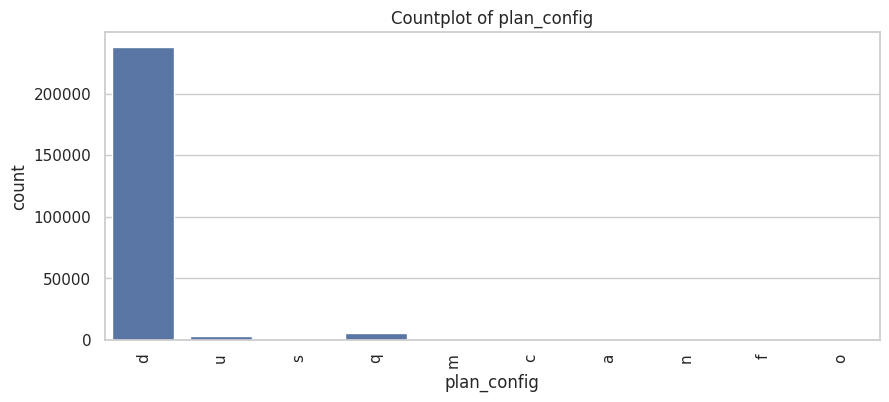

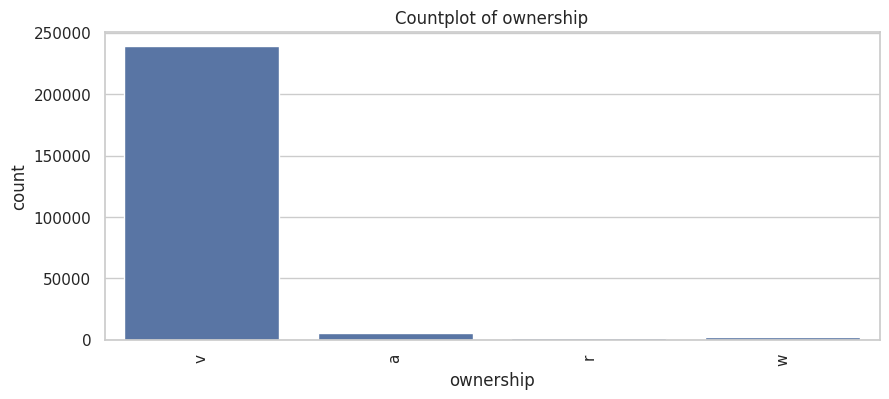

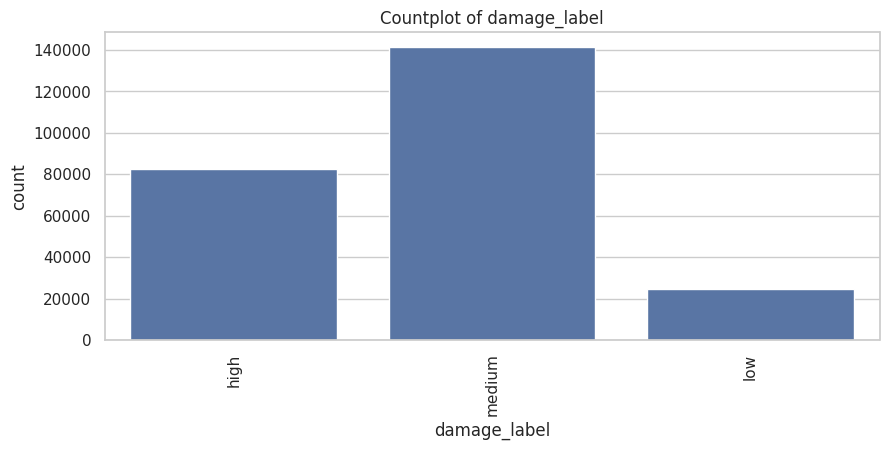

In [ ]:
# Univariate analysis for categorical columns (frequency distribution)
categorical_cols = df.select_dtypes(include='object').columns

for col in categorical_cols:
    plt.figure(figsize=(10,4))
    sns.countplot(x=col, data=df)
    plt.title(f"Countplot of {col}")
    plt.xticks(rotation=90)
    plt.show()


- The categorical univariate analysis shows how frequently each category appears in the dataset, such as roof type, foundation type, and building position.
- Most categories have one or two dominant values, indicating strong imbalance across several features.
- This helps identify which building characteristics are common and which are rare, guiding better feature engineering and model understanding

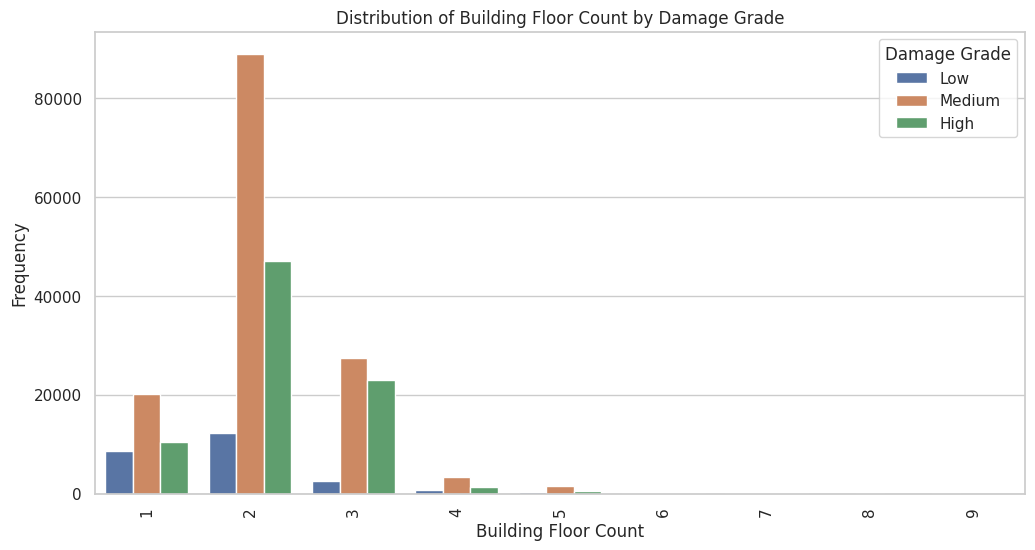

In [ ]:
# Countplot showing how earthquake damage varies across different floor counts
plt.figure(figsize=(12,6))
sns.countplot(x="floors", hue="damage_label", data=df)
plt.ylabel("Frequency")
plt.xlabel("Building Floor Count")
plt.xticks(rotation=90)
plt.title("Distribution of Building Floor Count by Damage Grade")
plt.legend(title="Damage Grade", labels=["Low", "Medium", "High"])
plt.show()

The plot shows that most buildings have 1–3 floors. Damage does not increase consistently with height, suggesting that building materials and design may influence earthquake safety more than floor count alone.

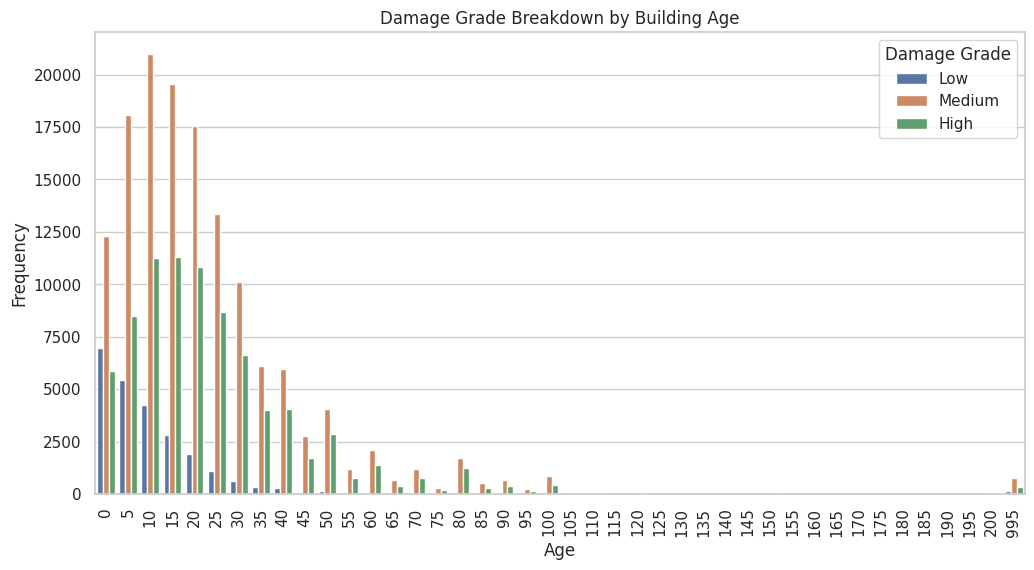

In [ ]:
# Countplot showing how building age relates to earthquake damage levels
plt.figure(figsize=(12,6))
sns.countplot(x="age", hue="damage_label", data=df)
plt.ylabel("Frequency")
plt.xlabel("Age")
plt.xticks(rotation=90)
plt.title("Damage Grade Breakdown by Building Age")
plt.legend(title="Damage Grade", labels=["Low", "Medium", "High"])
plt.show()

- Older buildings often show more medium or high damage compared to newer buildings.
- Some buildings in the dataset have very high ages that are not realistic.
- These unusual age values are called outliers because they do not match the rest of the data.

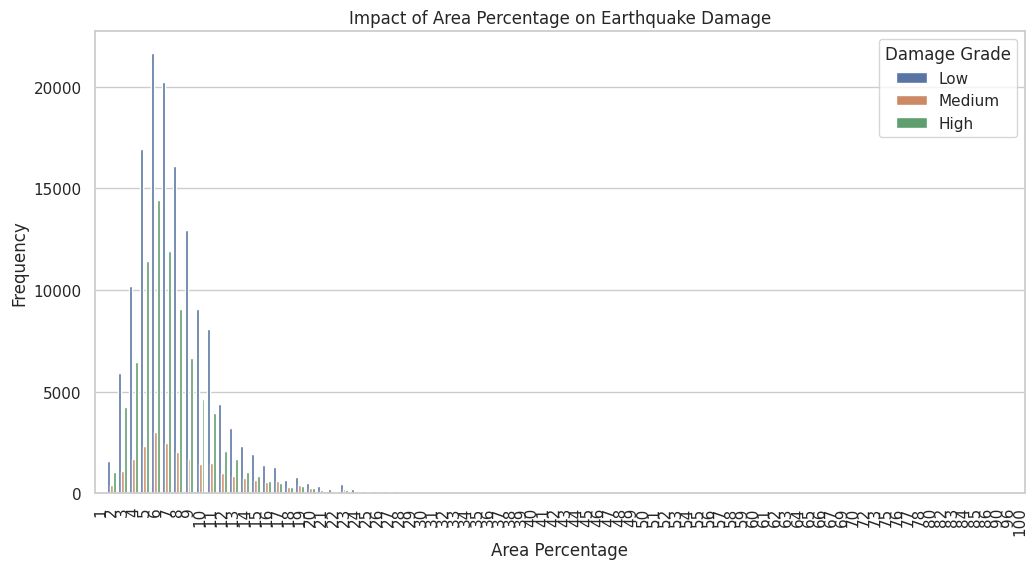

In [ ]:
# Countplot showing how area percentage relates to earthquake damage levels
plt.figure(figsize=(12,6))
sns.countplot(x="area_pct", hue="damage_label", data=df)
plt.ylabel("Frequency")
plt.xlabel("Area Percentage")
plt.xticks(rotation=90)
plt.title("Impact of Area Percentage on Earthquake Damage")
plt.legend(title="Damage Grade", labels=["Low", "Medium", "High"])
plt.show()

Most buildings occupy a small land area, usually between 5% and 15%.
Buildings with very high area percentages are rare and appear as outliers.

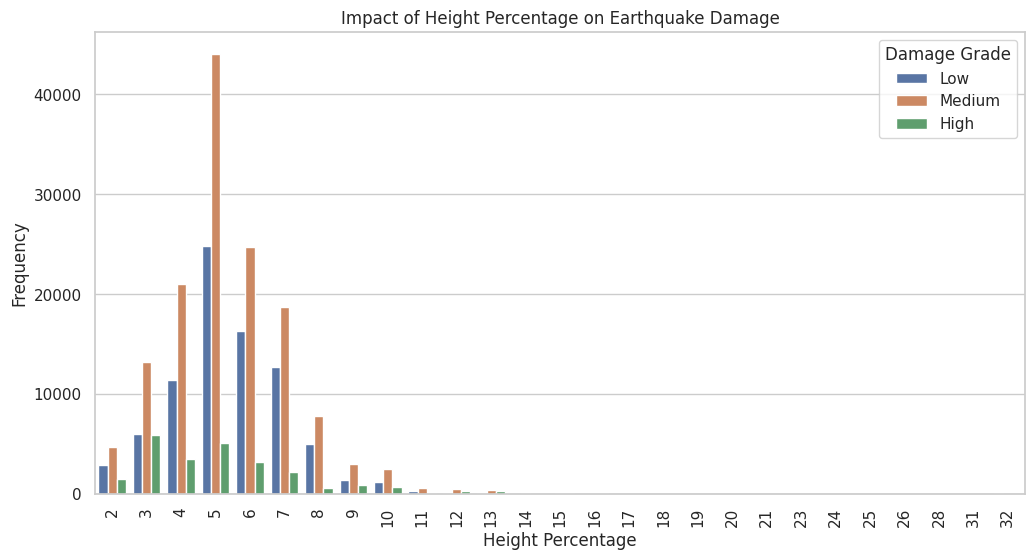

In [ ]:
# Countplot showing the relationship between building height percentage and earthquake damage levels
plt.figure(figsize=(12,6))
sns.countplot(x="height_pct", hue="damage_label", data=df)
plt.ylabel("Frequency")
plt.xlabel("Height Percentage")
plt.xticks(rotation=90)
plt.title("Impact of Height Percentage on Earthquake Damage")
plt.legend(title="Damage Grade", labels=["Low", "Medium", "High"])
plt.show()


- Most buildings have height percentages between 3 and 10, making those the most common values.
- Some buildings with very high height_pct values are outliers and appear rarely.

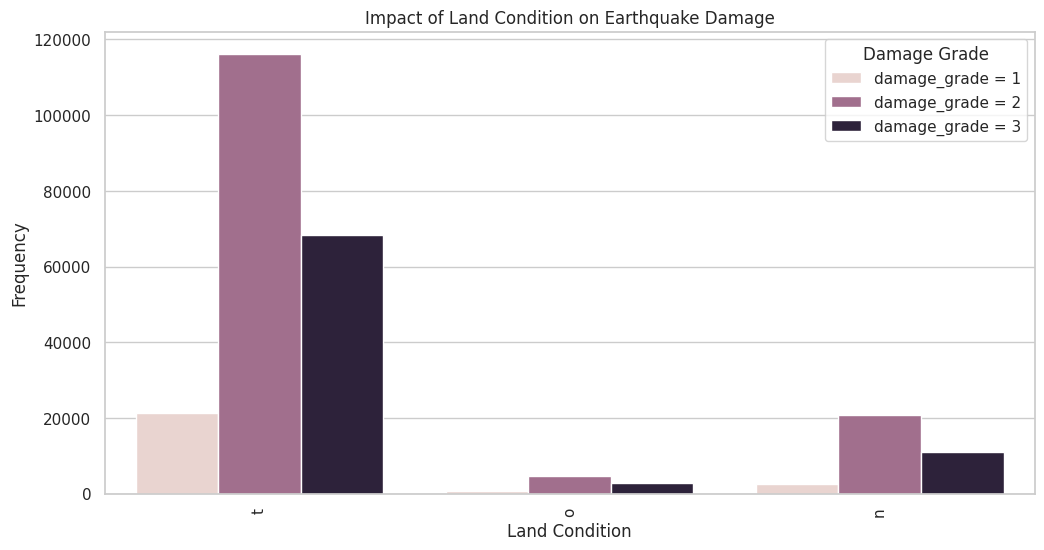

In [ ]:
# Countplot showing how land surface condition influences earthquake damage levels
plt.figure(figsize=(12,6))
sns.countplot(x="land_cond", hue="damage", data=df)
plt.ylabel("Frequency")
plt.xlabel("Land Condition")
plt.xticks(rotation=90)
plt.title("Impact of Land Condition on Earthquake Damage")
plt.legend(title="Damage Grade", labels=["damage_grade = 1","damage_grade = 2","damage_grade = 3"])
plt.show()

- Buildings mostly fall into one dominant land condition type.
- Damage levels are spread across all land conditions without a strong pattern.

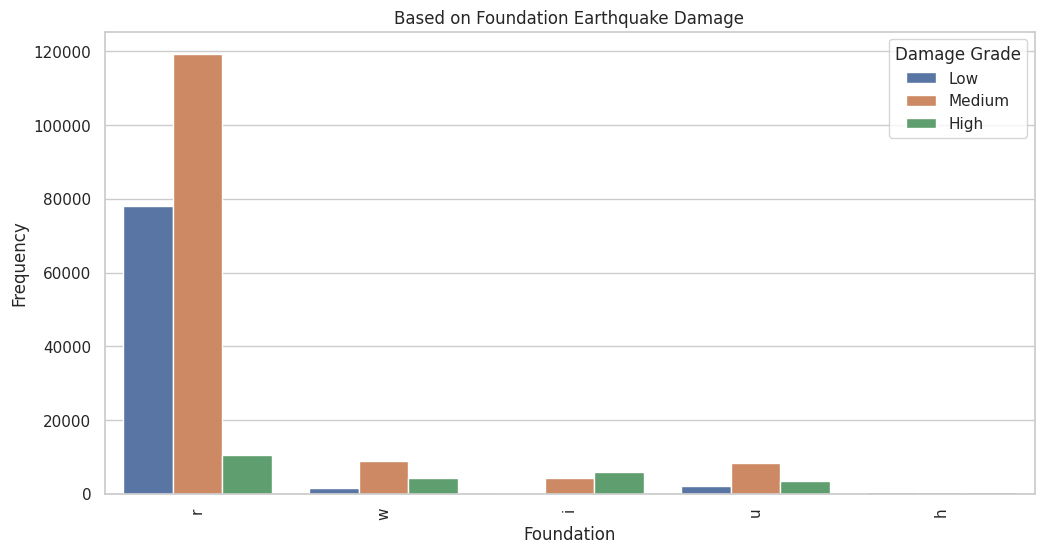

In [ ]:
# Countplot showing how different foundation types relate to earthquake damage levels
plt.figure(figsize=(12,6))
sns.countplot(x="foundation", hue="damage_label", data=df)
plt.ylabel("Frequency")
plt.xlabel("Foundation")
plt.xticks(rotation=90)
plt.title("Based on Foundation Earthquake Damage")
plt.legend(title="Damage Grade", labels=["Low", "Medium", "High"])
plt.show()



- Different foundation types show clear variations in earthquake damage levels.
- The most common foundation type experiences all damage grades, while some rarer foundations show slightly higher medium or high damage.
- This suggests that foundation design plays an important role in how well a building withstands an earthquake.

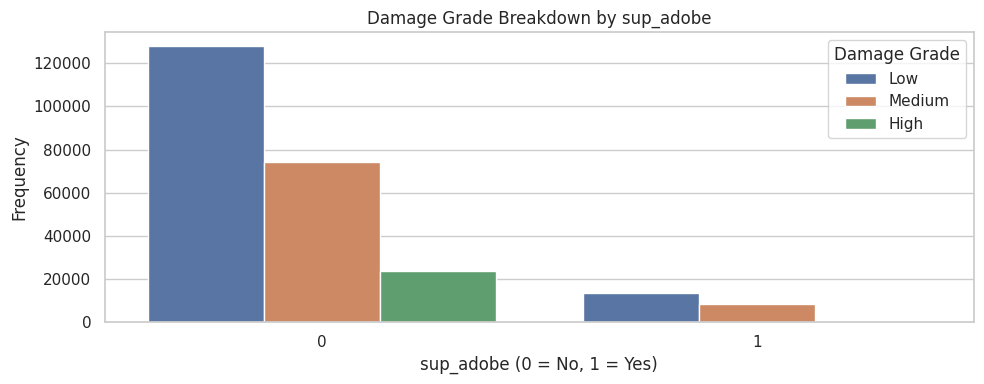

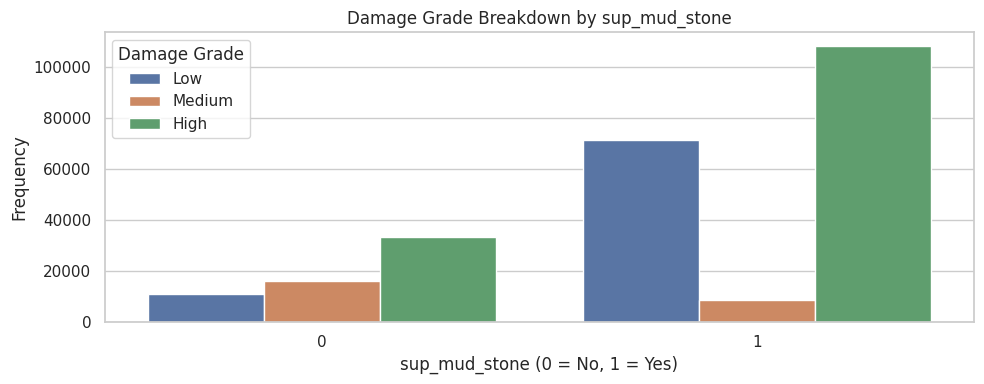

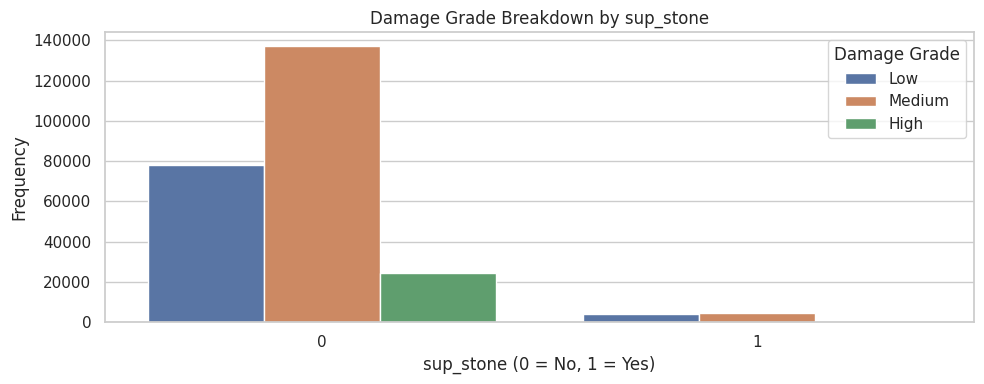

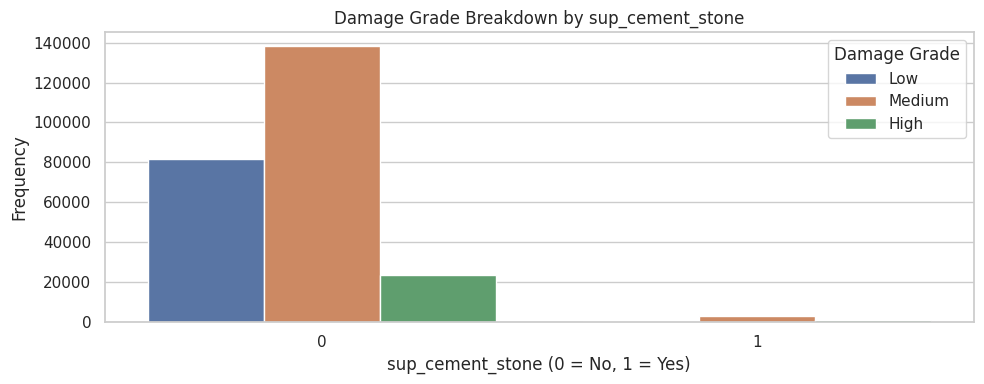

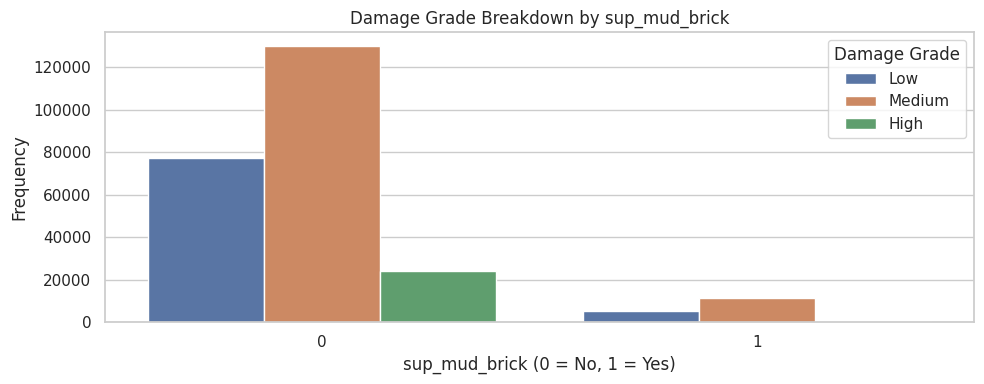

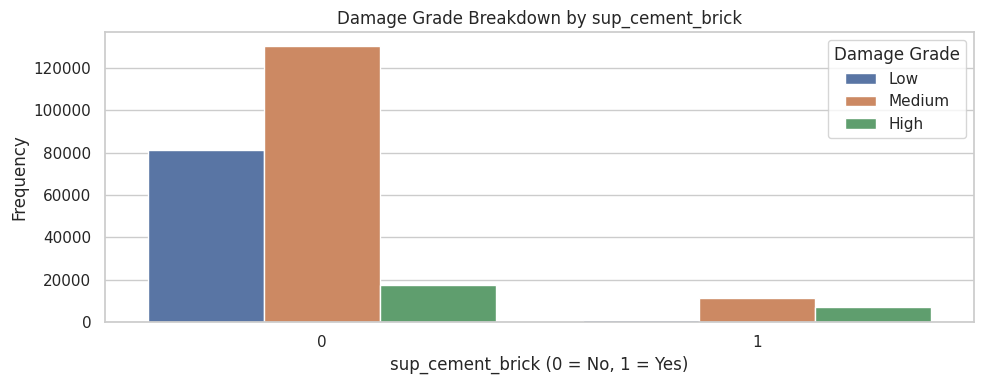

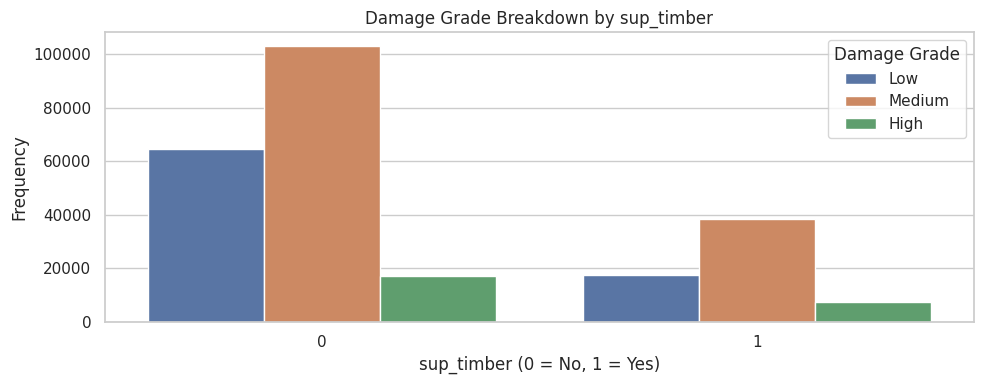

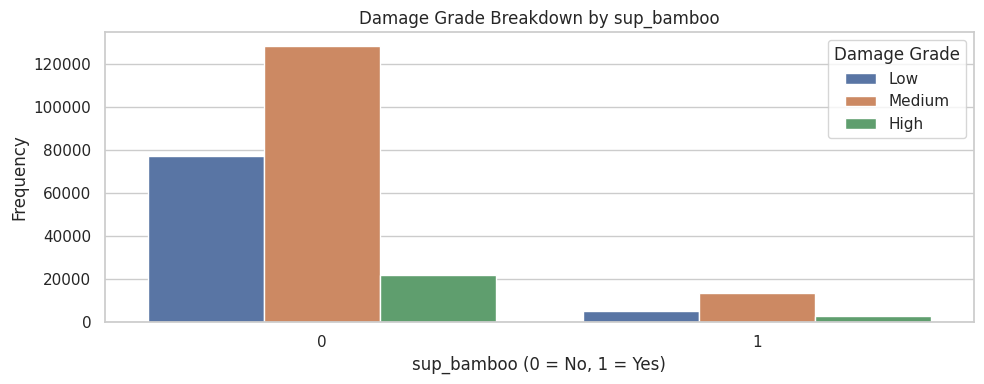

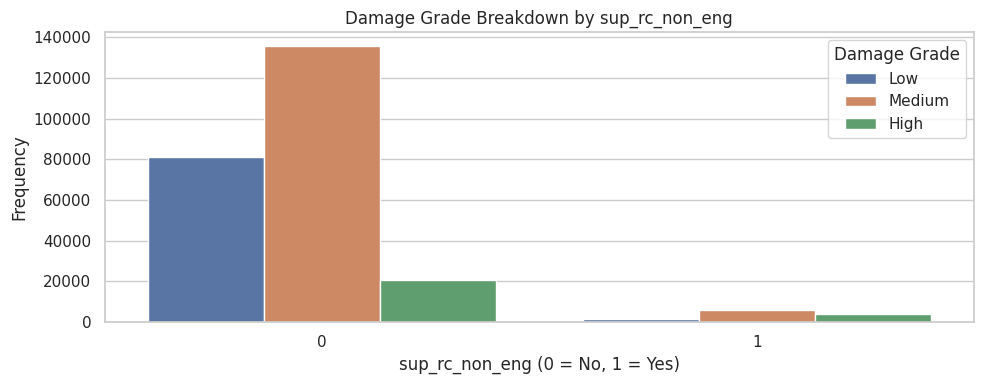

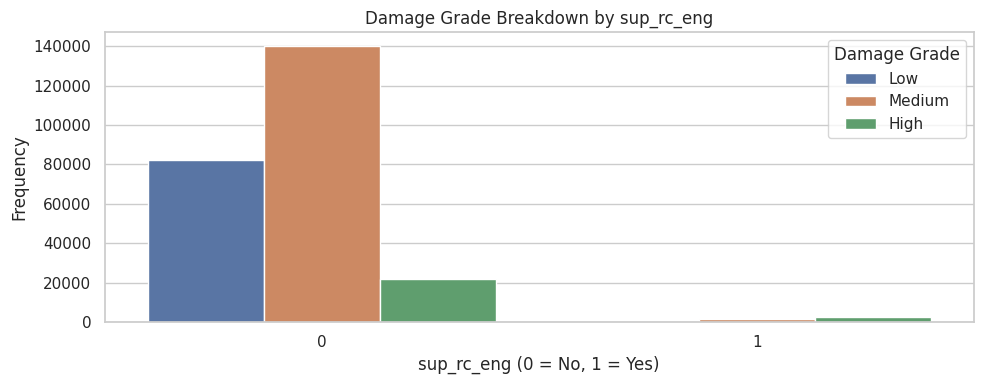

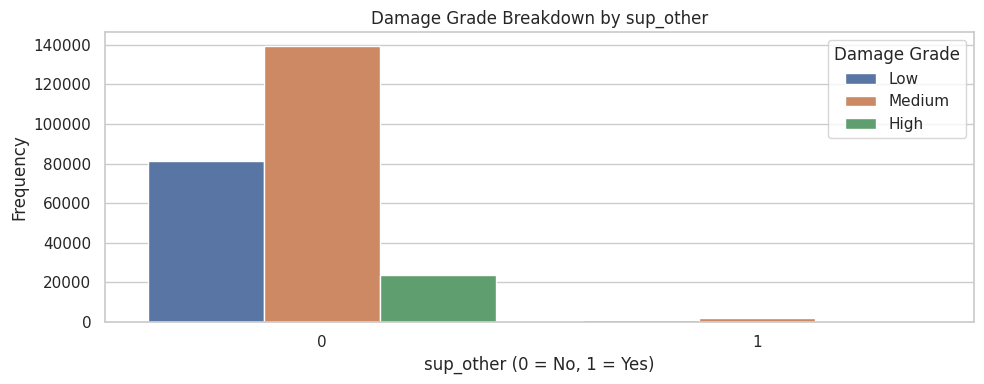

In [ ]:
# Countplots showing how different building materials relate to earthquake damage levels
material_features = [
    "sup_adobe", "sup_mud_stone", "sup_stone", "sup_cement_stone",
    "sup_mud_brick", "sup_cement_brick", "sup_timber", "sup_bamboo",
    "sup_rc_non_eng", "sup_rc_eng", "sup_other"
]

for feature in material_features:
    plt.figure(figsize=(10,4))
    sns.countplot(x=feature, hue="damage_label", data=df)
    plt.title(f"Damage Grade Breakdown by {feature}")
    plt.xlabel(f"{feature} (0 = No, 1 = Yes)")
    plt.ylabel("Frequency")
    plt.legend(title="Damage Grade", labels=["Low", "Medium", "High"])
    plt.tight_layout()
    plt.show()




- Material-based countplots show clear differences in how various construction materials react to earthquakes.
- Traditional materials such as mud, stone, and adobe often show higher damage levels, while engineered RC materials generally show lower damage.
- This analysis highlights how construction material choice strongly influences a building’s earthquake resistance.

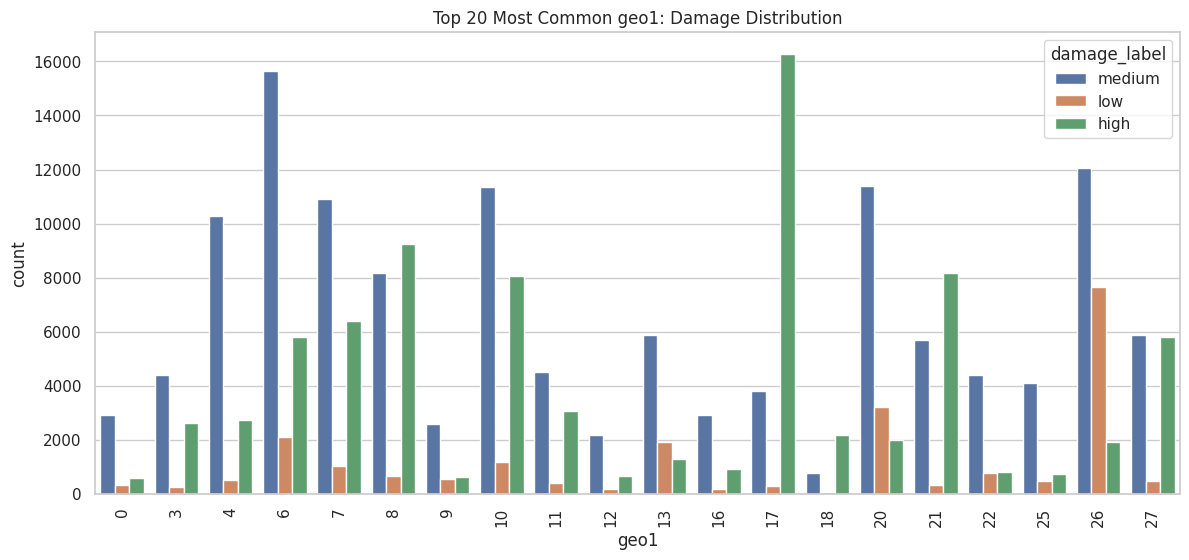

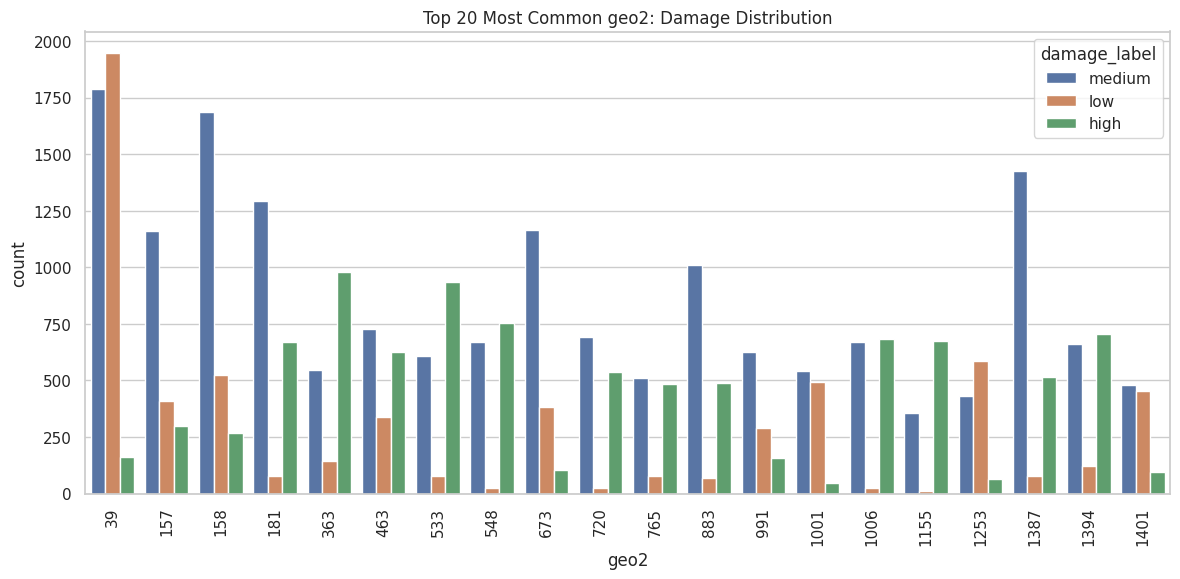

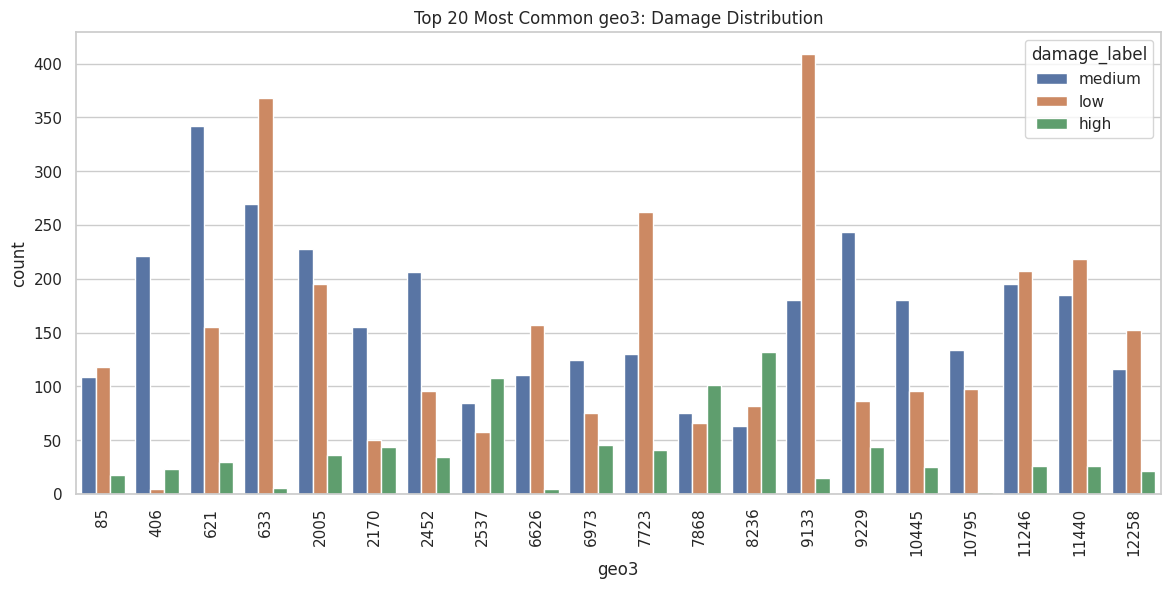

In [ ]:
# Countplots for geographic levels (geo1, geo2, geo3) to analyze location-wise damage patterns

df_sample = df.sample(5000, random_state=42)

# Function to plot top 20 most common GEO categories
def plot_top_geo(df, geo_col):
    top = df[geo_col].value_counts().head(20).index
    df_top = df[df[geo_col].isin(top)]

    plt.figure(figsize=(14,6))
    sns.countplot(x=geo_col, hue="damage_label", data=df_top)
    plt.title(f"Top 20 Most Common {geo_col}: Damage Distribution")
    plt.xticks(rotation=90)
    plt.show()

plot_top_geo(df, "geo1")
plot_top_geo(df, "geo2")
plot_top_geo(df, "geo3")




Due to high cardinality, GEO features were sampled for visualization; however, their consistent importance in tree-based models confirms that location significantly influences damage severity.

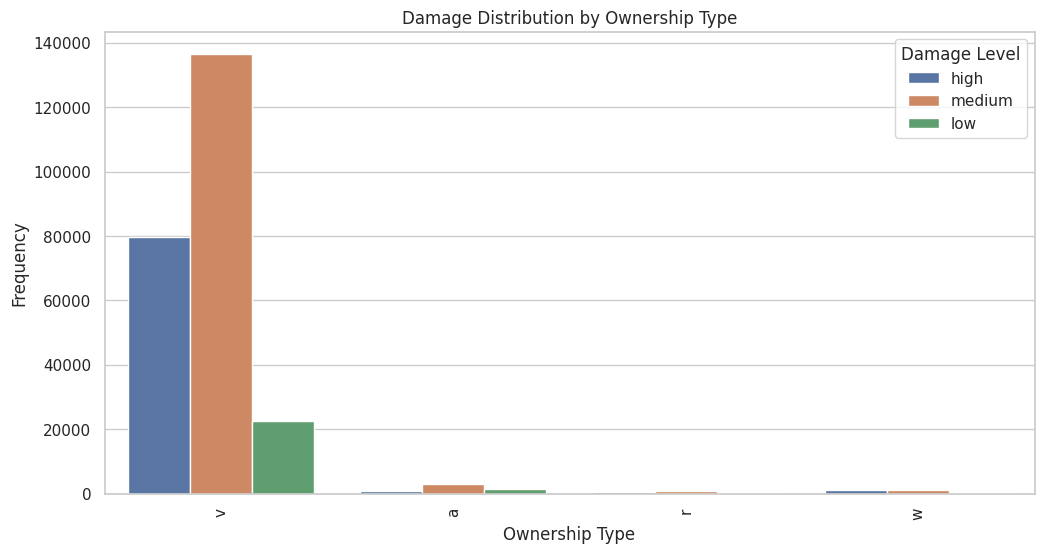

In [ ]:
# Plotting how different ownership types relate to earthquake damage levels
plt.figure(figsize=(12,6))
sns.countplot(x="ownership", hue="damage_label", data=df)
plt.title("Damage Distribution by Ownership Type")
plt.xlabel("Ownership Type")
plt.ylabel("Frequency")
plt.xticks(rotation=90)
plt.legend(title="Damage Level")
plt.show()


- Different ownership types show different levels of earthquake damage.
- Privately owned buildings appear more frequently in all categories, while some ownership types show slightly higher medium or high damage.
- This indicates that construction quality and maintenance might vary depending on who owns the building.

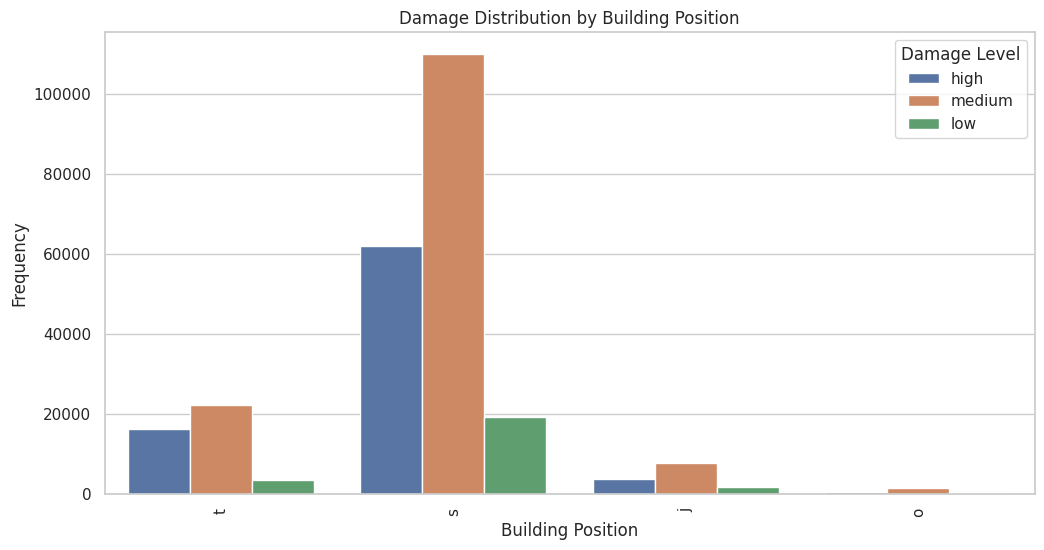

In [ ]:
# Visualizing how building position affects earthquake damage levels
plt.figure(figsize=(12,6))
sns.countplot(x="position", hue="damage_label", data=df)
plt.title("Damage Distribution by Building Position")
plt.xlabel("Building Position")
plt.ylabel("Frequency")
plt.xticks(rotation=90)
plt.legend(title="Damage Level")
plt.show()

- Buildings in different positions (corner, attached, stand-alone, etc.) show different damage patterns.
- Exposed or corner buildings may face stronger shaking, while attached buildings may get some structural support from neighbors.
- This suggests that the building’s physical position influences its earthquake performance.

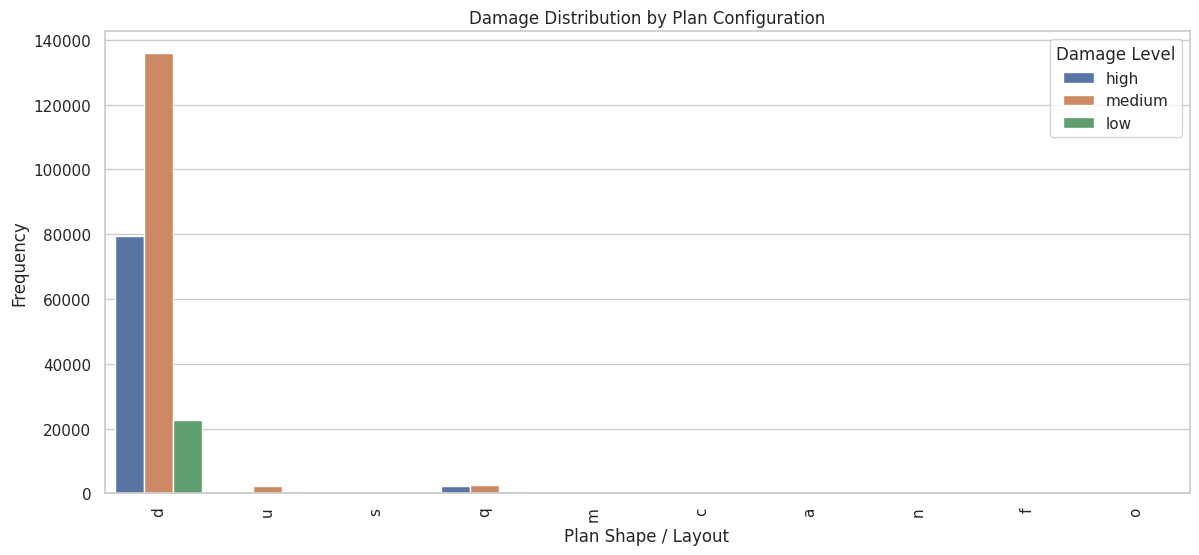

In [ ]:
# Checking how different building plan shapes relate to earthquake damage
plt.figure(figsize=(14,6))
sns.countplot(x="plan_config", hue="damage_label", data=df)
plt.title("Damage Distribution by Plan Configuration")
plt.xlabel("Plan Shape / Layout")
plt.ylabel("Frequency")
plt.xticks(rotation=90)
plt.legend(title="Damage Level")
plt.show()


- Different building shapes (L-shape, T-shape, rectangular, etc.) show different earthquake damage levels.
- Irregular shapes often show more medium or high damage because they distribute earthquake forces unevenly.
- This means the layout or plan shape of a building plays an important role in its structural stability.

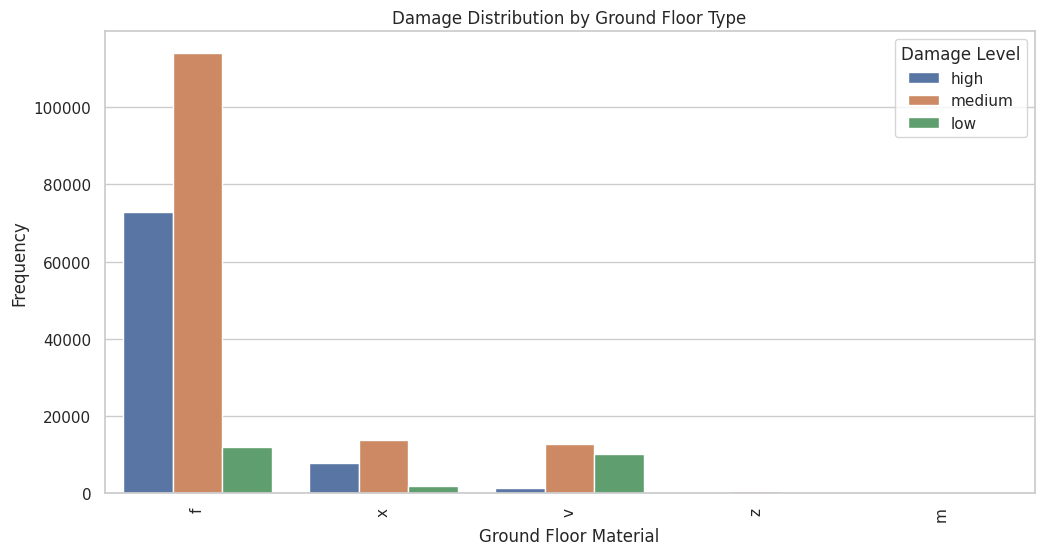

In [ ]:
# Comparing ground floor material types with earthquake damage levels
plt.figure(figsize=(12,6))
sns.countplot(x="ground_floor", hue="damage_label", data=df)
plt.title("Damage Distribution by Ground Floor Type")
plt.xlabel("Ground Floor Material")
plt.ylabel("Frequency")
plt.xticks(rotation=90)
plt.legend(title="Damage Level")
plt.show()


- Different ground floor materials show clear differences in earthquake damage.
- Weaker materials (like mud or timber) tend to show more medium or high damage, while stronger materials (like cement) perform better.
- This shows that the type of ground floor construction plays a big role in how much damage a building experiences.

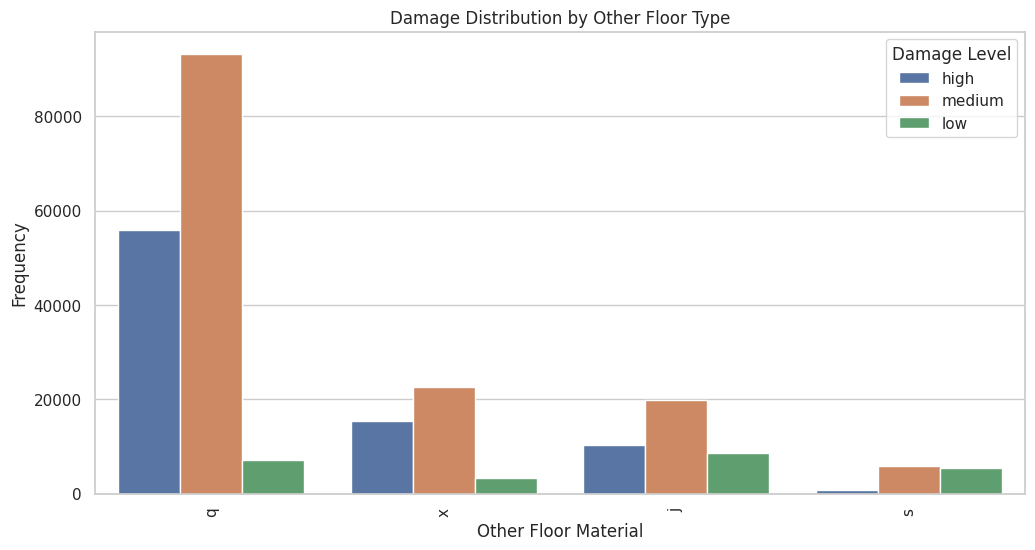

In [ ]:
# Comparing upper floor materials with earthquake damage levels
plt.figure(figsize=(12,6))
sns.countplot(x="other_floor", hue="damage_label", data=df)
plt.title("Damage Distribution by Other Floor Type")
plt.xlabel("Other Floor Material")
plt.ylabel("Frequency")
plt.xticks(rotation=90)
plt.legend(title="Damage Level")
plt.show()


- Different upper-floor materials show different patterns of earthquake damage.
- Buildings with weaker or lighter materials tend to show more medium and high damage compared to stronger construction types.
- This suggests that not just the ground floor, but the entire floor system affects the building’s overall earthquake strength.

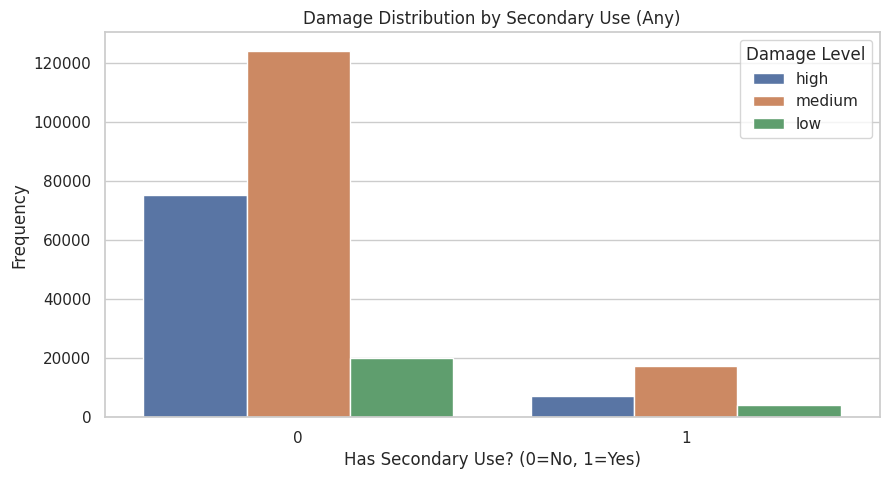

In [ ]:
# Checking how the presence of any secondary use affects earthquake damage levels
plt.figure(figsize=(10,5))
sns.countplot(x="sec_use", hue="damage_label", data=df)
plt.title("Damage Distribution by Secondary Use (Any)")
plt.xlabel("Has Secondary Use? (0=No, 1=Yes)")
plt.ylabel("Frequency")
plt.legend(title="Damage Level")
plt.show()


- Buildings that have a secondary use (like commercial activity, storage, or other functions) show slightly different damage patterns compared to buildings used only for housing.
- Secondary-use buildings may face more stress or may be older, which can increase medium or high damage.
- This indicates that the purpose of a building can influence how it reacts during an earthquake.

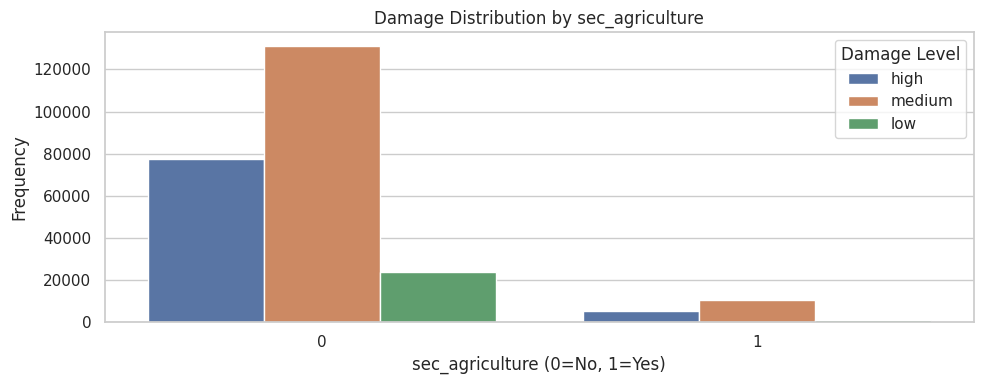

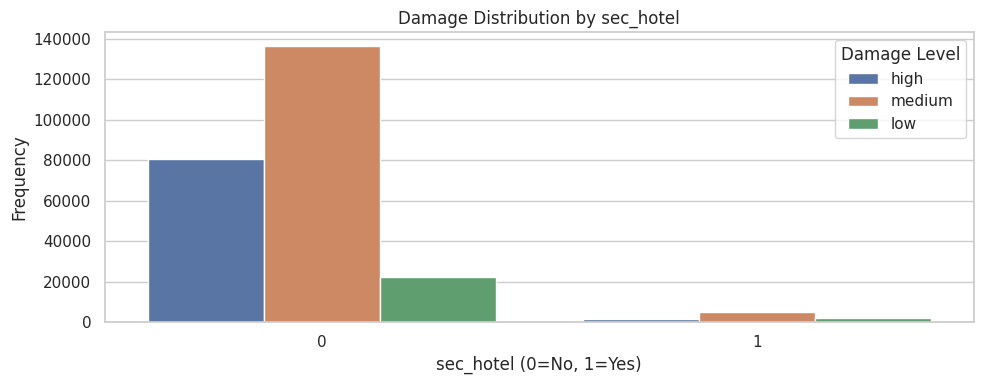

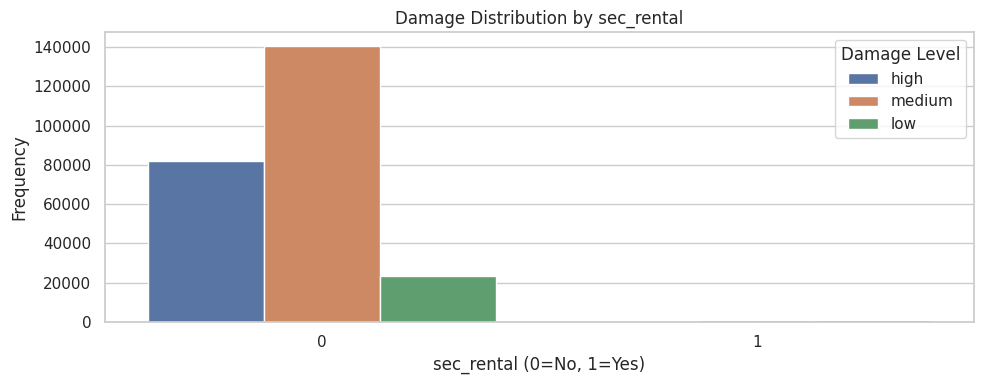

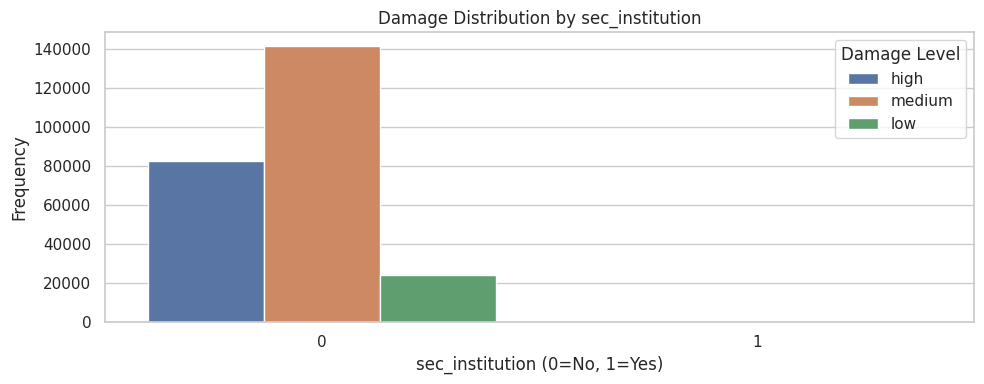

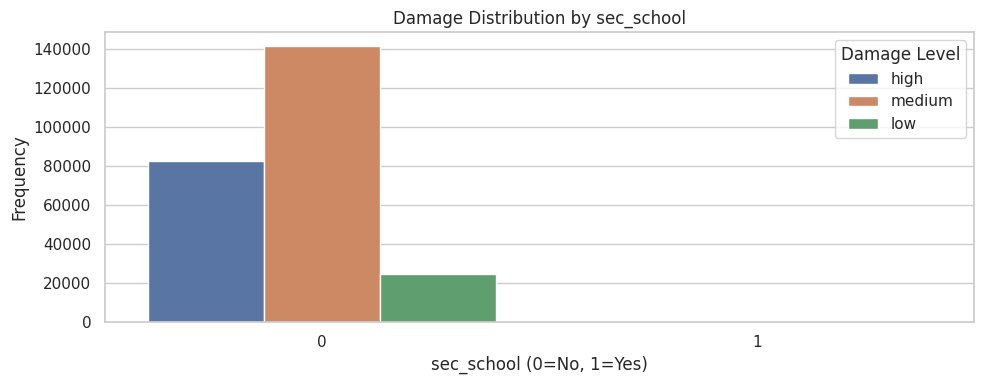

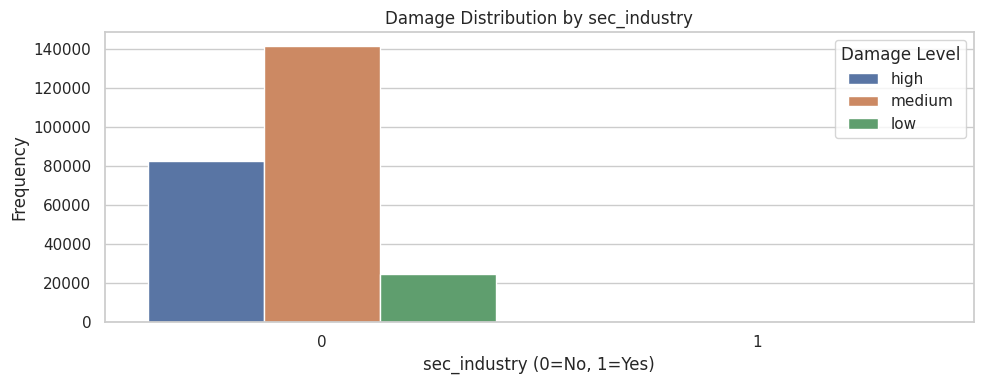

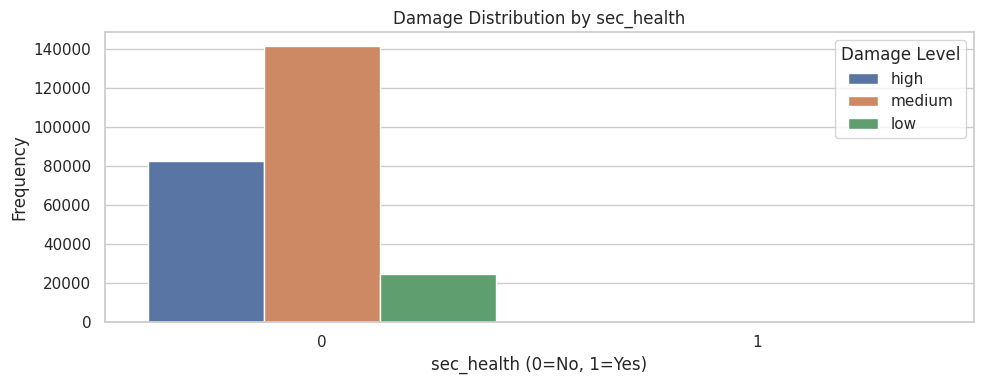

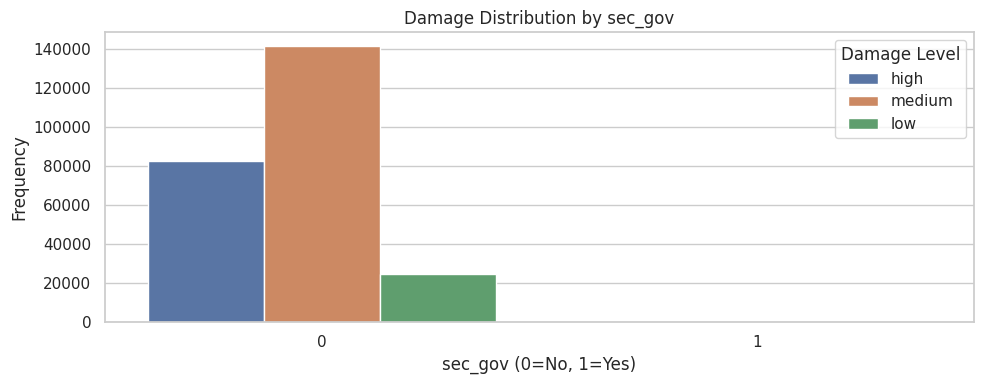

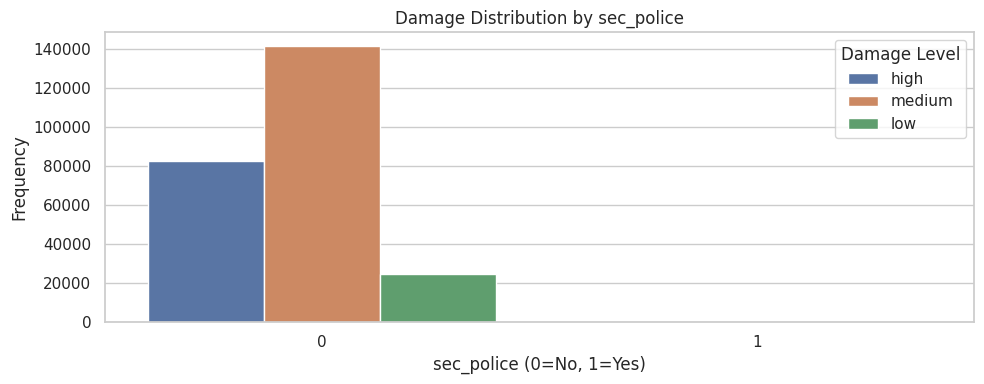

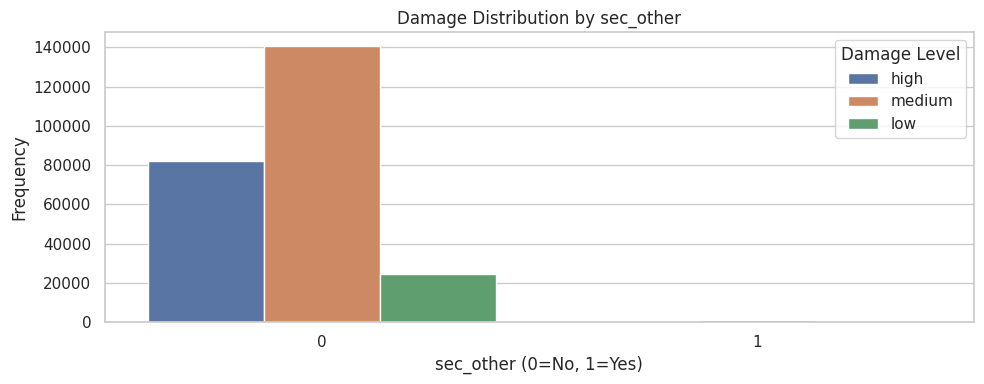

In [ ]:
# Visualizing how each specific secondary use type relates to earthquake damage levels
sec_use_cols = [
    "sec_agriculture", "sec_hotel", "sec_rental", "sec_institution",
    "sec_school", "sec_industry", "sec_health", "sec_gov",
    "sec_police", "sec_other"
]

for col in sec_use_cols:
    plt.figure(figsize=(10,4))
    sns.countplot(x=col, hue="damage_label", data=df)
    plt.title(f"Damage Distribution by {col}")
    plt.xlabel(f"{col} (0=No, 1=Yes)")
    plt.ylabel("Frequency")
    plt.legend(title="Damage Level")
    plt.tight_layout()
    plt.show()


- Each secondary-use category (such as school, hotel, rental, agriculture, etc.) shows different damage patterns.
- Some uses—like schools or institutions—often have stronger construction, while others like rental or agriculture buildings may show higher damage due to lower structural quality.
- This helps identify which building purposes are more vulnerable during earthquakes.

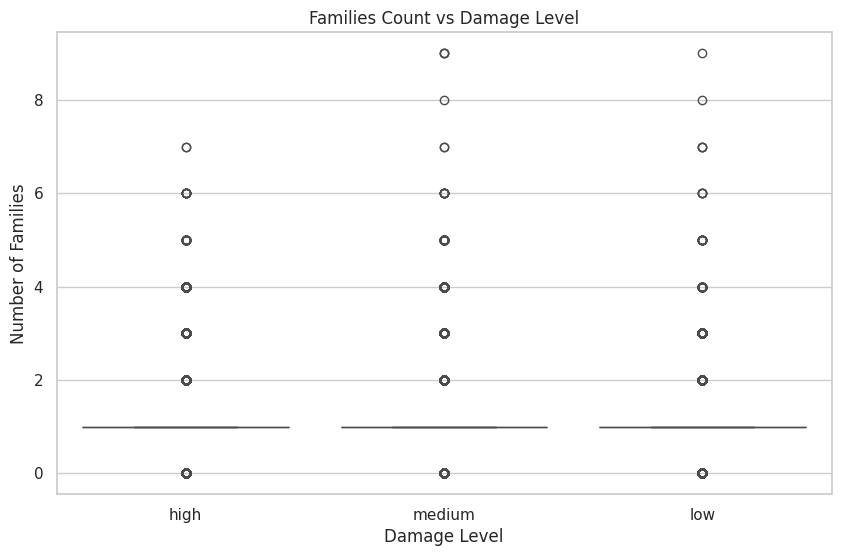

In [ ]:
# Boxplot to compare number of families across different damage levels
plt.figure(figsize=(10,6))
sns.boxplot(x="damage_label", y="families", data=df)
plt.title("Families Count vs Damage Level")
plt.xlabel("Damage Level")
plt.ylabel("Number of Families")
plt.show()


- The boxplot shows that most buildings, regardless of damage level, have 1 family living in them, meaning family count is similar across all categories.
- A few buildings have more families (2–9), but these don’t clearly belong to any one damage group.
- This means number of families does NOT strongly influence earthquake damage level.

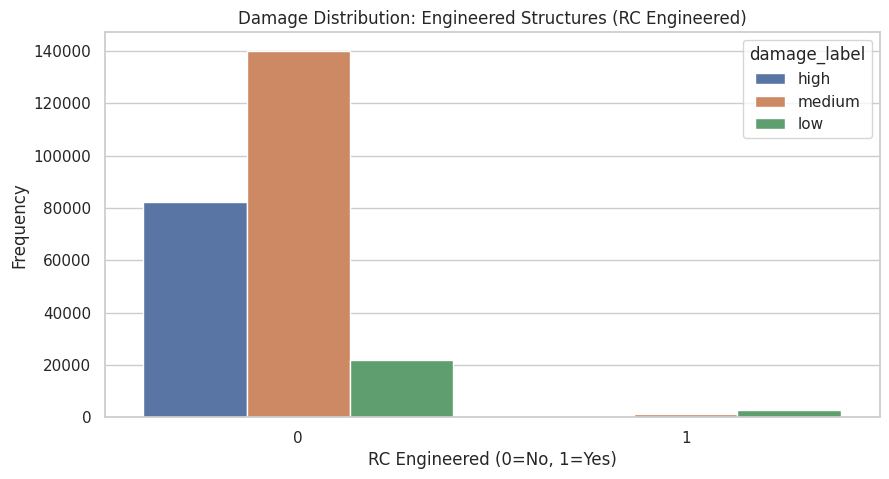

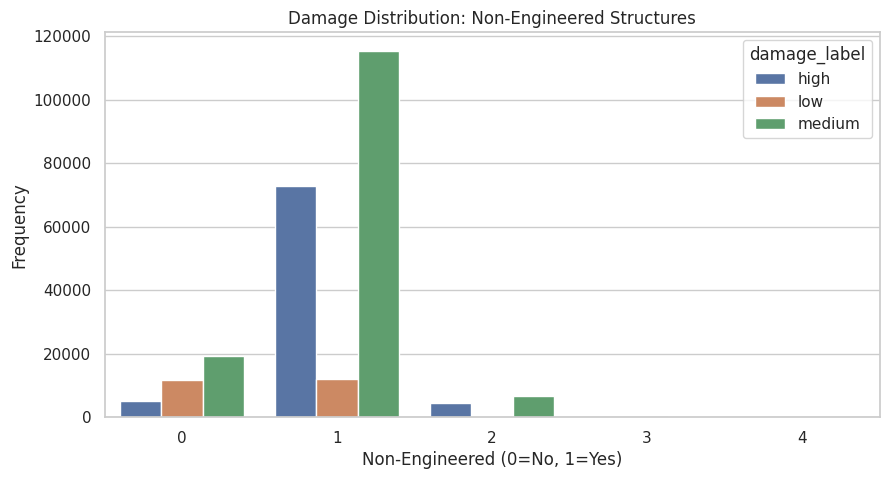

In [ ]:
# Compare earthquake damage between engineered (strong) and non-engineered (weak) buildings
df['engineered'] = df[['sup_rc_eng']].sum(axis=1)
df['non_engineered'] = df[['sup_rc_non_eng', 'sup_mud_brick', 'sup_mud_stone', 'sup_stone']].sum(axis=1)

plt.figure(figsize=(10,5))
sns.countplot(x="engineered", hue="damage_label", data=df)
plt.title("Damage Distribution: Engineered Structures (RC Engineered)")
plt.xlabel("RC Engineered (0=No, 1=Yes)")
plt.ylabel("Frequency")
plt.show()

plt.figure(figsize=(10,5))
sns.countplot(x="non_engineered", hue="damage_label", data=df)
plt.title("Damage Distribution: Non-Engineered Structures")
plt.xlabel("Non-Engineered (0=No, 1=Yes)")
plt.ylabel("Frequency")
plt.show()


- Engineered buildings (reinforced concrete) mostly show lower and medium damage, meaning they are safer during earthquakes.
- Non-engineered structures (mud, stone, weak materials) show more high-damage cases, proving they are more vulnerable.
- This comparison clearly shows that building material strength strongly affects earthquake resistance

#Overall Findings from Earthquake Damage Analysis
1️. Damage levels are imbalanced, with most buildings falling into the medium-damage category, meaning resampling (SMOTE) is needed for modeling.
2️. Older and taller buildings generally show higher damage, while smaller or newer buildings are more likely to have lower or medium damage.
3️. Building material plays a major role: non-engineered structures (mud, stone, adobe) show more severe damage, while engineered RC structures show lower damage.
4️. Location (GEO regions) influences damage patterns, suggesting geographical or soil factors may affect earthquake impact.
5️. Some categorical building features (land condition, foundation, roof type, floor materials) show clear differences in damage distribution, indicating structural design affects vulnerability.
6️. Features like number of families and most secondary-use types do NOT strongly affect damage, meaning they are not major predictors in the model.

In [ ]:
#pairplot (use sample to avoid crashing)
df_sample = df.sample(1500, random_state=42)

sns.pairplot(
    data=df_sample,
    hue="damage_label",
    palette="Set2",
    corner=True
)
plt.show()


- A pairplot helps us see how different numeric features relate to each other and to the damage level.
- Although the relationships are not very strong, the plot gives a quick visual idea of trends like older or taller buildings showing higher damage.
- Using a sample avoids slow processing because the dataset is very large.

# 6️) OUTLIER DETECTION AND TREATMENT (IQR METHOD)

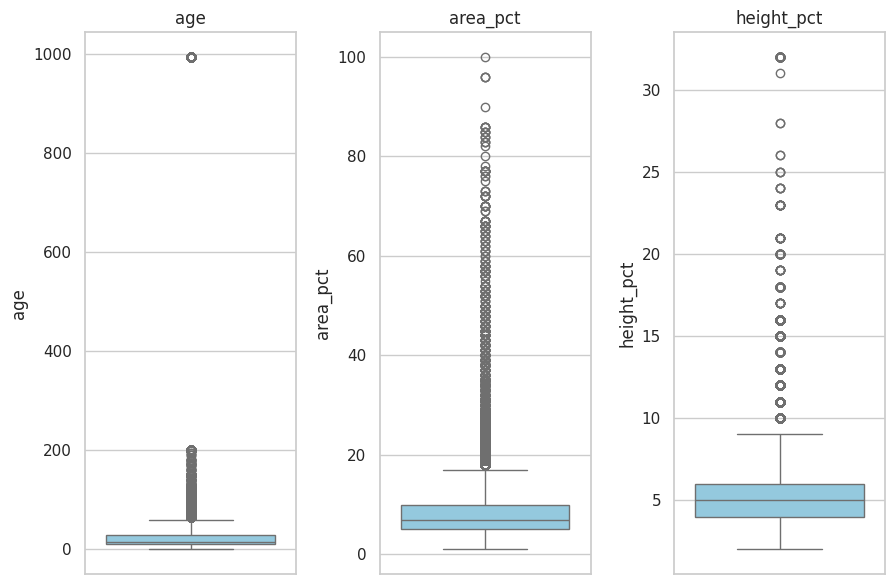

In [ ]:
# Boxplots to visualize outliers in numeric columns
#before outlier handling
numeric_cols = [ "age", "area_pct", "height_pct"]

plt.figure(figsize=(15, 6))

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(1, 5, i)
    sns.boxplot(y=df[col], color="skyblue")
    plt.title(col)

plt.tight_layout()
plt.show()

- Each numeric column contains noticeable outliers, especially age, area_pct, and height_pct.
- Because these extreme values can affect the model badly, we apply IQR-based capping to reduce their impact.

In [ ]:
# Outlier handling for numeric columns
def cap_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    df[col] = np.where(df[col] < lower, lower,
               np.where(df[col] > upper, upper, df[col]))

    return df

for col in numeric_cols:
    df = cap_outliers(df, col)

print("Outliers capped successfully!")


Outliers capped successfully!


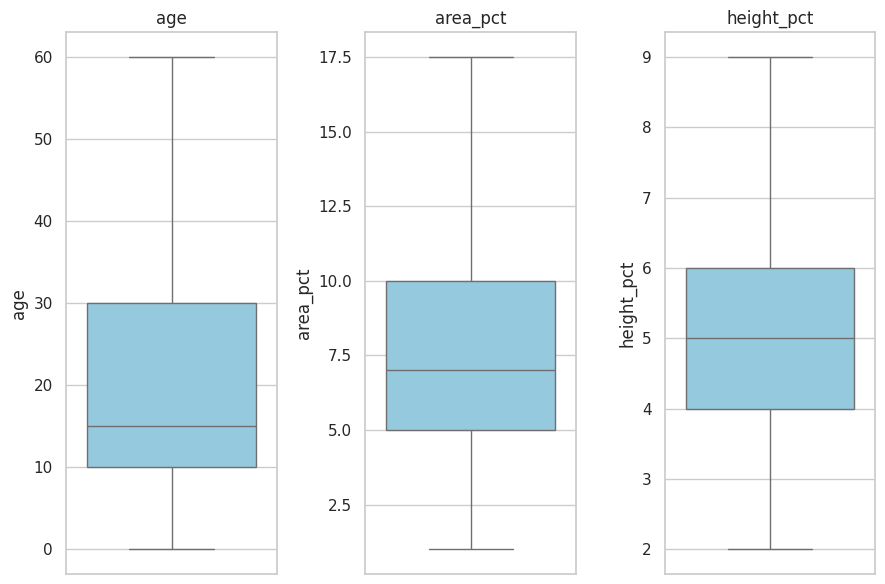

In [ ]:
#after outlier handling
numeric_cols = [ "age", "area_pct", "height_pct"]

plt.figure(figsize=(15, 6))

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(1, 5, i)
    sns.boxplot(y=df[col], color="skyblue")
    plt.title(col)

plt.tight_layout()
plt.show()

We used the IQR method to cap outliers in the numeric features. Any values falling outside the acceptable range were replaced with the nearest valid boundary, ensuring cleaner and more stable data for modeling.

# 7️) ENCODING DAMAGE LABEL

In [ ]:
# Encoding the damage labels (low, medium, high) into numeric values for model training
damage_mapping = {
    "low": 1,
    "medium": 2,
    "high": 3
}

# Convert damage_label to numeric
df["Damage"] = df["damage_label"].map(damage_mapping)

# Drop old columns
df = df.drop(columns=["damage", "damage_label"], errors="ignore")
# Shift Damage labels from (1,2,3) → (0,1,2) for XGBoost compatibility
df["Damage"] = df["Damage"] - 1

The damage categories were mapped to numeric values (1–3) to create a machine-learning-friendly target variable, and the original text columns were removed.

## 8) FEATURE ENGINEERING (small, high-value steps)
- Create engineered features: `non_engineered` and `engineered` flags that summarize superstructure.
- Keep geo features as-is (some models will leverage them).


In [ ]:

# engineered vs non-engineered summary flags
df['engineered'] = df['sup_rc_eng']  # 1 for engineered RC
df['non_engineered'] = df[['sup_rc_non_eng', 'sup_mud_brick', 'sup_mud_stone', 'sup_stone']].sum(axis=1)
df['non_engineered'] = (df['non_engineered'] > 0).astype(int)

#ratio features (families per floor)
df['families_per_floor'] = df['families'] / (df['floors'].replace(0, np.nan))
df['families_per_floor'] = df['families_per_floor'].fillna(df['families'])


# 9) ONE-HOT ENCODING FOR CATEGORICAL VARIABLES

In [ ]:
# Converting all categorical columns into numeric form using One-Hot Encoding
cat_cols_fe = df.select_dtypes(include=['object']).columns
df = pd.get_dummies(df, columns=cat_cols_fe, drop_first=True)

print('Shape after encoding:', df.shape)
df.head()


Shape after encoding: (248282, 64)


geo1  geo2   geo3  floors   age  area_pct  height_pct  sup_adobe  \
0     6   487  12198       2  30.0       6.0         5.0          1   
1     8   900   2812       2  10.0       8.0         7.0          0   
2    21   363   8973       2  10.0       5.0         5.0          0   
3    22   418  10694       2  10.0       6.0         5.0          0   
4    11   131   1488       3  30.0       8.0         9.0          1   

   sup_mud_stone  sup_stone  sup_cement_stone  sup_mud_brick  \
0              1          0                 0              0   
1              1          0                 0              0   
2              1          0                 0              0   
3              1          0                 0              0   
4              0          0                 0              0   

   sup_cement_brick  sup_timber  sup_bamboo  sup_rc_non_eng  sup_rc_eng  \
0                 0           0           0               0           0   
1                 0           0           0               0           0   
2                 0           0           0               0           0   
3                 0           1           1               0           0   
4                 0           0           0               0           0   

   sup_other  families  sec_use  sec_agriculture  sec_hotel  sec_rental  \
0          0         1        0                0          0           0   
1          0         1        0                0          0           0   
2          0         1        0                0          0           0   
3          0         1        0                0          0           0   
4          0         1        0                0          0           0   

   sec_institution  sec_school  sec_industry  sec_health  sec_gov  sec_police  \
0                0           0             0           0        0           0   
1                0           0             0           0        0           0   
2                0           0             0           0        0           0   
3                0           0             0           0        0           0   
4                0           0             0           0        0           0   

   sec_other  engineered  non_engineered  Damage  families_per_floor  \
0          0           0               1       2            0.500000   
1          0           0               1       1            0.500000   
2          0           0               1       2            0.500000   
3          0           0               1       1            0.500000   
4          0           0               0       2            0.333333   

   land_cond_o  land_cond_t  foundation_i  foundation_r  foundation_u  \
0        False         True         False          True         False   
1         True        False         False          True         False   
2        False         True         False          True         False   
3        False         True         False          True         False   
4        False         True         False          True         False   

   foundation_w  roof_q  roof_x  ground_floor_m  ground_floor_v  \
0         False   False   False           False           False   
1         False   False   False           False           False   
2         False   False   False           False           False   
3         False   False   False           False           False   
4         False   False   False           False           False   

   ground_floor_x  ground_floor_z  other_floor_q  other_floor_s  \
0           False           False           True          False   
1            True           False           True          False   
2           False           False          False          False   
3           False           False          False          False   
4           False           False          False          False   

   other_floor_x  position_o  position_s  position_t  plan_config_c  \
0          False       False       False        True 

- This code identifies all columns with text (categorical) values and converts them into numeric dummy variables using one-hot encoding.
- Each category becomes a new column with 0/1 values so that machine-learning models can understand them.
- drop_first=True prevents duplicate information and avoids multicollinearity by removing one category from each set.

In [ ]:
#Move Damage Column to the End
df = df[[col for col in df.columns if col != "Damage"] + ["Damage"]]


# 10) CORRELATION ANALYSIS

In [ ]:
# Finding the correlation between numerical features
df.corr()

geo1      geo2      geo3    floors       age  area_pct  \
geo1           1.000000 -0.062078  0.002780 -0.090059 -0.052941  0.065368   
geo2          -0.062078  1.000000  0.003837  0.048359  0.032856 -0.038015   
geo3           0.002780  0.003837  1.000000 -0.020549 -0.005498 -0.003927   
floors        -0.090059  0.048359 -0.020549  1.000000  0.278910  0.113650   
age           -0.052941  0.032856 -0.005498  0.278910  1.000000 -0.031604   
...                 ...       ...       ...       ...       ...       ...   
plan_config_u  0.033501 -0.025860  0.003380 -0.004626 -0.017731  0.098679   
ownership_r    0.007689 -0.027393 -0.001368 -0.008239 -0.003458 -0.020308   
ownership_v   -0.079558  0.022741 -0.017916  0.072291  0.061533  0.034644   
ownership_w    0.004467  0.013982 -0.012349  0.007245  0.013751 -0.003541   
Damage        -0.071436  0.042543  0.008402  0.117703  0.166648 -0.124353   

               height_pct  sup_adobe  sup_mud_stone  sup_stone  \
geo1            -0.071878  -0.019590      -0.148600   0.008378   
geo2             0.038042   0.015506       0.076028  -0.008354   
geo3            -0.018860  -0.015839       0.027591   0.019440   
floors           0.773137   0.176119      -0.031637  -0.040806   
age              0.207472   0.199747       0.061357   0.011224   
...                   ...        ...            ...        ...   
plan_config_u    0.003777   0.018736      -0.098312  -0.009933   
ownership_r     -0.010465   0.025245      -0.047417  -0.005032   
ownership_v      0.068424  -0.005359       0.123503   0.005276   
ownership_w      0.002407   0.034287      -0.004067   0.005670   
Damage           0.067677   0.057065       0.289829   0.067569   

               sup_cement_stone  sup_mud_brick  sup_cement_brick  sup_timber  \
geo1                   0.023855      -0.029197          0.133543    0.143679   
geo2                  -0.009069       0.013594         -0.079183   -0.026242   
geo3                   0.006027      -0.023087         -0.006265   -0.003254   
floors                -0.011312       0.258774         -0.080933   -0.057485   
age                   -0.045960       0.235084         -0.145365   -0.036567   
...                         ...            ...               ...         ...   
plan_config_u          0.020009       0.040681          0.093739    0.016068   
ownership_r           -0.006840       0.027714          0.004397    0.011012   
ownership_v           -0.000960      -0.000839         -0.049739   -0.071604   
ownership_w           -0.006193       0.008458         -0.014637   -0.019296   
Damage                -0.060202       0.015610         -0.254093   -0.067322   

               sup_bamboo  sup_rc_non_eng  sup_rc_eng  sup_other  families  \
geo1             0.074664        0.015413    0.014904   0.023174  0.035600   
geo2            -0.033518       -0.037615   -0.035478  -0.020327 -0.012495   
geo3             0.006384        0.001947   -0.012752  -0.010833 -0.002442   
floors          -0.071821        0.008835    0.051181  -0.030261  0.087503   
age             -0.050499       -0.094452   -0.105377  -0.008465  0.043483   
...                   ...             ...         ...        ...       ...   
plan_config_u    0.014814        0.028529    0.013743   0.010350  0.015640   
ownership_r      0.032375        0.004613   -0.001210   0.009274  0.001502   
ownership_v     -0.071019        0.003296    0.012558  -0.014194  0.001436   
ownership_w     -0.005467       -0.006971   -0.008911  -0.004781  0.008814   
Damage          -0.061938       -0.159611   -0.180219  -0.029352  0.056635   

                sec_use  sec_agriculture  sec_hotel  sec_rental  \
geo1          -0.011340        -0.021115   0.001756    0.024007   
geo2          -0.000920         0.018779  -0.008517   -0.031247   
geo3           0.007523         0.016412  -0.002071   -0.007472   
floors         0.052846        -0.005943   0.078254    0.035979   
age           -0.039320         0.006506  -0.055508   -0.026750   
.

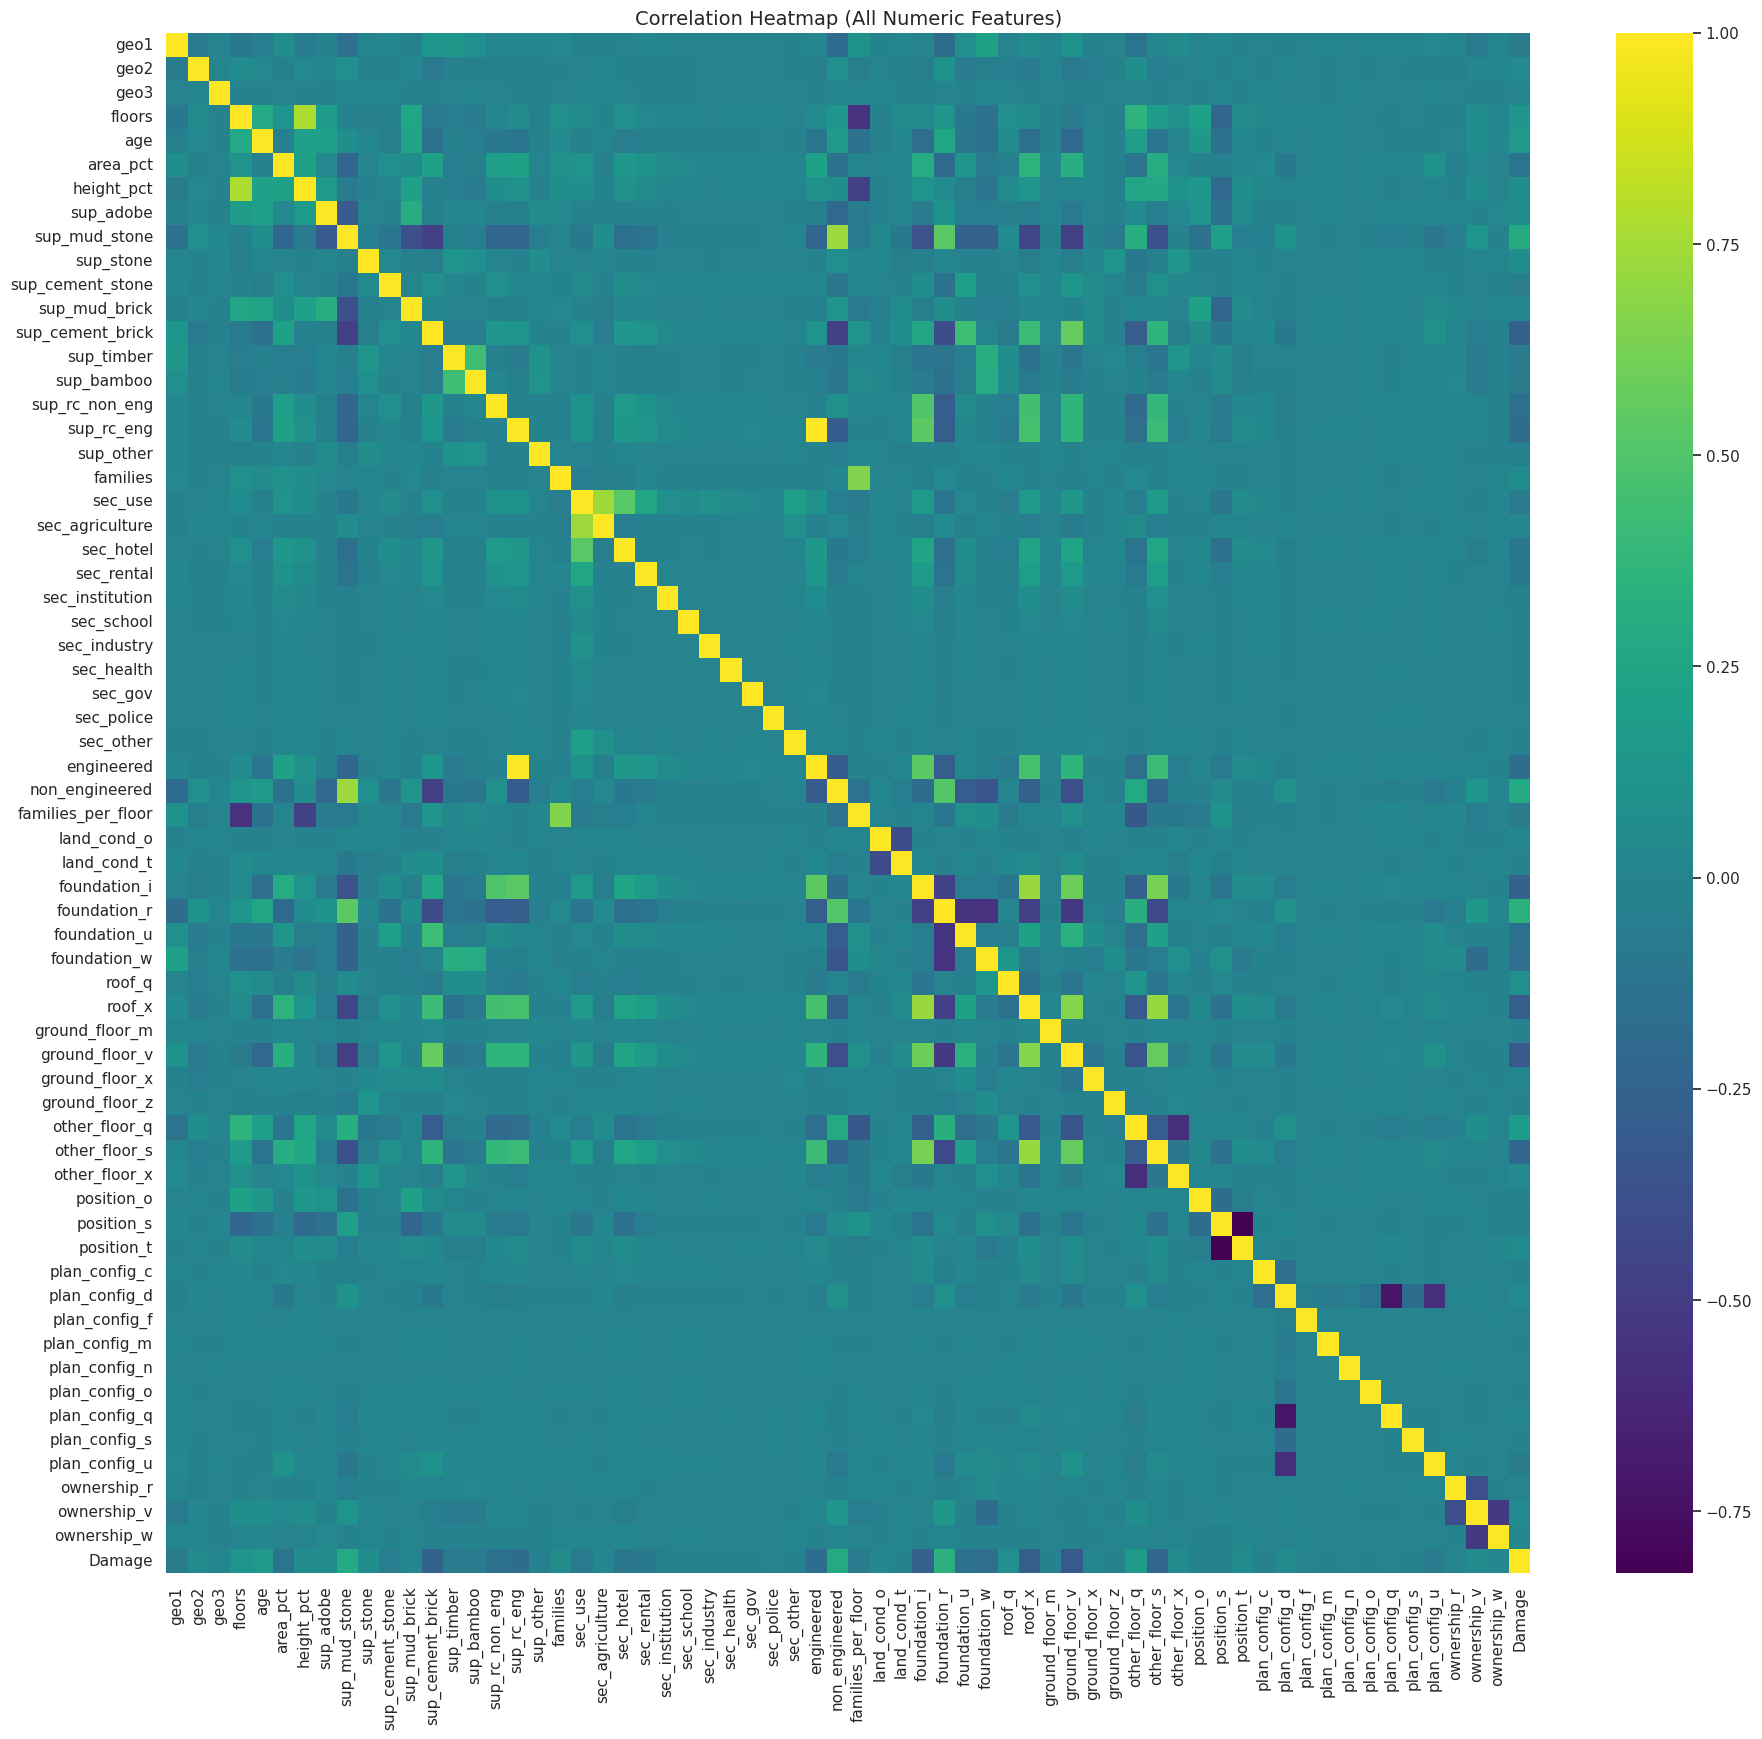

In [ ]:
# Correlation heatmap for ALL numeric columns in the dataset
plt.figure(figsize=(22,20))

sns.heatmap(
    df.corr(),
    cmap="viridis",
    annot=False,
    linewidths=0,
    linecolor=None,
    cbar=True,
    square=False
)

plt.title("Correlation Heatmap (All Numeric Features)", fontsize=14)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()



- The heatmap shows that no single feature has a strong correlation with Damage, meaning earthquake damage depends on many small factors rather than one dominant variable.

- Some material-related features (like non-engineered, mud-brick, rc-engineered) show slightly higher correlations, meaning construction quality influences damage levels.

- Location (geo levels) and most secondary-use features have very weak correlations, confirming that damage is complex and best modeled using advanced algorithms like XGBoost rather than linear methods.

In [ ]:
#check for multicollinearity
numeric_cols_for_vif = ["age", "floors", "area_pct", "height_pct"]

vif_df = pd.DataFrame()
vif_df["Feature"] = numeric_cols_for_vif
vif_df["VIF"] = [
    variance_inflation_factor(df[numeric_cols_for_vif].values, i)
    for i in range(len(numeric_cols_for_vif))
]

print(vif_df)




      Feature        VIF
0         age   2.737355
1      floors  23.691859
2    area_pct   5.146802
3  height_pct  26.510648


Although features like floors and height_pct showed high VIF, they were retained because tree-based models are robust to multicollinearity and these features carry strong structural meaning.

# 11) TRAIN–TEST SPLIT (STRATIFIED)

In [ ]:
# Define features and target
X = df.drop("Damage", axis=1)
Y = df["Damage"]


In [ ]:
# Train-test split (before scaling)
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.2, random_state=42, stratify=Y
)


- We split the data into training (80%) and testing (20%) parts.

- stratify=Y keeps the damage class balance the same in both sets — this is very important for fair evaluation.

- random_state=42 ensures the split is repeatable every time.

In [ ]:
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)


X_train shape: (198625, 63)
X_test shape: (49657, 63)



# 12) HANDLING IMBALANCED DATA USING SMOTE

### Why SMOTE Was Used?
The target variable (Damage) is highly imbalanced, with severe damage cases being underrepresented.
In a disaster-response context, under-predicting severe damage is riskier than over-predicting it.

We evaluated class_weight-based approaches during experimentation; however, SMOTE provided:
- Better recall for severe damage class
- More stable weighted F1-score across cross-validation folds

Because the objective prioritizes identifying vulnerable buildings over strict probability calibration,
SMOTE was chosen as an acceptable trade-off for this risk-sensitive classification problem.


In [ ]:
# Missing values in the training and testing datasets were imputed with zero to ensure model stability and prevent errors during training.
X_train = X_train.fillna(0)
X_test  = X_test.fillna(0)

Missing values were imputed with zero across all features, including one-hot encoded columns, which is safe for tree-based models and avoids introducing artificial scaling bias.

In [ ]:
# Applying Smote
sm = SMOTE(random_state=42)

# Apply SMOTE on ORIGINAL (unscaled) training data
X_train_resampled, y_train_resampled = sm.fit_resample(X_train, Y_train)

print("After SMOTE:", X_train_resampled.shape, y_train_resampled.shape)



After SMOTE: (339612, 63) (339612,)


# 13) FEATURE SCALING (STANDARD SCALER)

In [ ]:
#scale the training data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)

# 14) MODEL TRAINING & EVALUATION





In [ ]:
results = {}

def store_result(model_name, y_true, y_pred):
    acc = accuracy_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred, average="weighted")
    results[model_name] = [acc, f1]


In [ ]:
# Random Forest

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_resampled, y_train_resampled)

y_pred_rf = rf.predict(X_test)

print("Random Forest")
print("Accuracy:", accuracy_score(Y_test, y_pred_rf))
print("F1 Score:", f1_score(Y_test, y_pred_rf, average='weighted'))
print(classification_report(Y_test, y_pred_rf))



Random Forest
Accuracy: 0.6869323559618986
F1 Score: 0.6829519001976327
              precision    recall  f1-score   support

           0       0.58      0.52      0.55      4886
           1       0.71      0.78      0.74     28302
           2       0.67      0.58      0.62     16469

    accuracy                           0.69     49657
   macro avg       0.65      0.62      0.64     49657
weighted avg       0.68      0.69      0.68     49657



In [ ]:
store_result("Random Forest", Y_test, y_pred_rf)

In [ ]:
# LightGBM

lgbm = LGBMClassifier(random_state=42)
lgbm.fit(X_train_resampled, y_train_resampled)

y_pred_lgbm = lgbm.predict(X_test)

print("LightGBM")
print("Accuracy:", accuracy_score(Y_test, y_pred_lgbm))
print("F1 Score:", f1_score(Y_test, y_pred_lgbm, average='weighted'))
print(classification_report(Y_test, y_pred_lgbm))




[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.152153 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1687
[LightGBM] [Info] Number of data points in the train set: 339612, number of used features: 63
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
LightGBM
Accuracy: 0.6947660954145438
F1 Score: 0.689534847359289
              precision    recall  f1-score   support

           0       0.59      0.50      0.54      4886
           1       0.71      0.80      0.75     28302
           2       0.69      0.57      0.63     16469

    accuracy                           0.69     49657
   macro avg       0.66      0.62      0.64     49657
weighted avg       0.69      0.69      0.69     49657



In [ ]:
store_result("Light GBM", Y_test, y_pred_lgbm)

In [ ]:
# XGBoost

xgb = XGBClassifier(
    eval_metric='mlogloss',
    random_state=42
)

xgb.fit(X_train_scaled, y_train_resampled)

y_pred_xgb = xgb.predict(X_test_scaled)

print("XGBoost")
print("Accuracy:", accuracy_score(Y_test, y_pred_xgb))
print("F1 Score:", f1_score(Y_test, y_pred_xgb, average='weighted'))
print(classification_report(Y_test, y_pred_xgb))





XGBoost
Accuracy: 0.7089030750951527
F1 Score: 0.702771100797992
              precision    recall  f1-score   support

           0       0.63      0.49      0.55      4886
           1       0.72      0.82      0.76     28302
           2       0.71      0.58      0.64     16469

    accuracy                           0.71     49657
   macro avg       0.69      0.63      0.65     49657
weighted avg       0.71      0.71      0.70     49657



In [ ]:
store_result("XGBoost", Y_test, y_pred_xgb)


In [ ]:
#CatBoost model
cat_model = CatBoostClassifier(
    iterations=1000,
    depth=8,
    learning_rate=0.05,
    loss_function="MultiClass",
    eval_metric="Accuracy",
    task_type="CPU",
    verbose=200,
    random_seed=42
)

cat_model.fit(X_train_resampled, y_train_resampled)

# Predict on test
y_pred_cat = cat_model.predict(X_test)
y_pred_cat = y_pred_cat.astype(int)

print("\nCatBoost Base Results:")
print("Accuracy:", accuracy_score(Y_test, y_pred_cat))
print("F1 Score:", f1_score(Y_test, y_pred_cat, average='weighted'))
print(classification_report(Y_test, y_pred_cat))


0:	learn: 0.6112328	total: 400ms	remaining: 6m 39s
200:	learn: 0.7619077	total: 1m 13s	remaining: 4m 53s
400:	learn: 0.7847603	total: 2m 27s	remaining: 3m 39s
600:	learn: 0.7975042	total: 3m 40s	remaining: 2m 26s
800:	learn: 0.8058873	total: 4m 54s	remaining: 1m 13s
999:	learn: 0.8121533	total: 6m 19s	remaining: 0us

CatBoost Base Results:
Accuracy: 0.7095273576736412
F1 Score: 0.7035922491594307
              precision    recall  f1-score   support

           0       0.62      0.51      0.56      4886
           1       0.72      0.82      0.77     28302
           2       0.72      0.58      0.64     16469

    accuracy                           0.71     49657
   macro avg       0.69      0.64      0.65     49657
weighted avg       0.71      0.71      0.70     49657



In [ ]:

store_result("CatBoost Base", Y_test, y_pred_cat)

CatBoost was intentionally evaluated on original data to assess its native handling of imbalance. However, for strict fairness, future work will evaluate CatBoost with balanced data using class weights or SMOTE-based pipelines.

# 15) HYPERPARAMETER TUNING (RANDOMIZED SEARCH CV)

In [ ]:
#Random Forest after hyperparameter tuning
params_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

rf_search = RandomizedSearchCV(
    RandomForestClassifier(random_state=42),
    params_rf,
    cv=3,
    scoring='f1_weighted',
    n_iter=5,
    n_jobs=-1
)

rf_search.fit(X_train_resampled, y_train_resampled)

print("Best Params RF:", rf_search.best_params_)


pred_rf = rf_search.best_estimator_.predict(X_test)

print("Best Tuned RF Results:")
print("Accuracy:", accuracy_score(Y_test, pred_rf))
print("F1 Score:", f1_score(Y_test, pred_rf, average='weighted'))
print(classification_report(Y_test, pred_rf))


Best Params RF: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_depth': None, 'bootstrap': True}
Best Tuned RF Results:
Accuracy: 0.6922488269528969
F1 Score: 0.6892782878007842
              precision    recall  f1-score   support

           0       0.56      0.58      0.57      4886
           1       0.72      0.78      0.75     28302
           2       0.69      0.57      0.63     16469

    accuracy                           0.69     49657
   macro avg       0.65      0.64      0.65     49657
weighted avg       0.69      0.69      0.69     49657



In [ ]:
store_result("RF Tuned", Y_test, pred_rf)

In [ ]:
#LightGBM after hyperparameter tuning

params_lgbm = {
    'num_leaves': [31, 50, 70],
    'max_depth': [-1, 10, 20],
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [100, 200, 300],
    'subsample': [0.7, 0.8, 1.0],
    'colsample_bytree': [0.7, 0.8, 1.0]
}
lgbm_search = RandomizedSearchCV(
    estimator=LGBMClassifier(random_state=42),
    param_distributions=params_lgbm,
    cv=3,
    scoring='f1_weighted',
    n_iter=10,
    n_jobs=-1,
    verbose=1
)

lgbm_search.fit(X_train_resampled, y_train_resampled)


print("Best LGBM Parameters:")
print(lgbm_search.best_params_)

pred_lgbm = lgbm_search.best_estimator_.predict(X_test)

# Evaluation
print("Best Tuned LGBM Results:")
print("Accuracy:", accuracy_score(Y_test, pred_lgbm))
print("F1 Score:", f1_score(Y_test, pred_lgbm, average='weighted'))
print("\nClassification Report:")
print(classification_report(Y_test, pred_lgbm))

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.150305 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1687
[LightGBM] [Info] Number of data points in the train set: 339612, number of used features: 63
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
Best LGBM Parameters:
{'subsample': 0.8, 'num_leaves': 70, 'n_estimators': 300, 'max_depth': 20, 'learning_rate': 0.1, 'colsample_bytree': 1.0}
Best Tuned LGBM Results:
Accuracy: 0.7286183216867712
F1 Score: 0.7230067841538799

Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.51      0.58      4886
           1       0.73      0.84      0.78     28302
         

In [ ]:
store_result("LGBM Tuned", Y_test, pred_lgbm)

In [ ]:
#XGBoost after hyperparameter tuning
params_xgb = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 6, 10],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.7, 0.8, 1.0],
    'colsample_bytree': [0.7, 0.8, 1.0],
    'gamma': [0, 1, 5]
}

xgb_search = RandomizedSearchCV(
    estimator=XGBClassifier(eval_metric='mlogloss', random_state=42),
    param_distributions=params_xgb,
    cv=3,
    scoring='f1_weighted',
    n_iter=5,
    n_jobs=-1,
    verbose=1
)


xgb_search.fit(X_train_scaled, y_train_resampled)


print(" Best XGBoost Parameters:")
print(xgb_search.best_params_)


pred_xgb = xgb_search.best_estimator_.predict(X_test_scaled)


print(" Best Tuned XGBoost Results:")
print("Accuracy:", accuracy_score(Y_test, pred_xgb))
print("F1 Score:", f1_score(Y_test, pred_xgb, average='weighted'))
print("\nClassification Report:")
print(classification_report(Y_test, pred_xgb))




Fitting 3 folds for each of 5 candidates, totalling 15 fits
 Best XGBoost Parameters:
{'subsample': 0.8, 'n_estimators': 200, 'max_depth': 10, 'learning_rate': 0.1, 'gamma': 0, 'colsample_bytree': 1.0}
 Best Tuned XGBoost Results:
Accuracy: 0.7309342086714864
F1 Score: 0.7255669515189848

Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.51      0.58      4886
           1       0.73      0.84      0.78     28302
           2       0.74      0.61      0.67     16469

    accuracy                           0.73     49657
   macro avg       0.71      0.65      0.68     49657
weighted avg       0.73      0.73      0.73     49657



In [ ]:
store_result("XGB Tuned", Y_test, pred_xgb)

In [ ]:
#catBoost after hyperparameter tuning
cat_params = {
    "iterations": [500, 800, 1200],
    "depth": [6, 8, 10],
    "learning_rate": [0.01, 0.03, 0.05],
    "l2_leaf_reg": [1, 3, 5, 7, 9],
    "border_count": [32, 64, 128]
}

cat_tuned = CatBoostClassifier(
    loss_function="MultiClass",
    task_type="CPU",   # change to GPU if available
    verbose=0
)

cat_search = RandomizedSearchCV(
    estimator=cat_tuned,
    param_distributions=cat_params,
    cv=3,
    n_iter=10,
    scoring="f1_weighted",
    n_jobs=-1,
    random_state=42
)

print("Running CatBoost Hyperparameter Tuning...")
cat_search.fit(X_train_resampled, y_train_resampled)


print("Best CatBoost Parameters:")
print(cat_search.best_params_)


pred_cat_tuned = cat_search.best_estimator_.predict(X_test)
pred_cat_tuned = pred_cat_tuned.astype(int)

print(" Tuned CatBoost Results:")
print("Accuracy:", accuracy_score(Y_test, pred_cat_tuned))
print("F1 Score:", f1_score(Y_test, pred_cat_tuned, average='weighted'))
print(classification_report(Y_test, pred_cat_tuned))



Running CatBoost Hyperparameter Tuning...
Best CatBoost Parameters:
{'learning_rate': 0.05, 'l2_leaf_reg': 1, 'iterations': 1200, 'depth': 8, 'border_count': 32}
 Tuned CatBoost Results:
Accuracy: 0.7096481865598002
F1 Score: 0.7036126034327868
              precision    recall  f1-score   support

           0       0.63      0.51      0.56      4886
           1       0.72      0.82      0.77     28302
           2       0.72      0.57      0.64     16469

    accuracy                           0.71     49657
   macro avg       0.69      0.64      0.66     49657
weighted avg       0.71      0.71      0.70     49657



In [ ]:

store_result("CatBoost Tuned", Y_test, pred_cat_tuned)

# 16) MODEL PERFORMANCE COMPARISON TABLE


In [ ]:
# Create a table of model performance, sort models by F1 score (best first), and display the results
df_results = pd.DataFrame(results, index=["Accuracy", "F1 Score"]).T
df_results = df_results.sort_values("F1 Score", ascending=False)
print(df_results)


                Accuracy  F1 Score
XGB Tuned       0.730934  0.725567
LGBM Tuned      0.728618  0.723007
CatBoost Tuned  0.709648  0.703613
CatBoost Base   0.709527  0.703592
XGBoost         0.708903  0.702771
Light GBM       0.694766  0.689535
RF Tuned        0.692249  0.689278
Random Forest   0.686932  0.682952


#17) SELECTING THE BEST MODEL


In [ ]:
#SELECTING THE BEST MODEL

best_model_name = df_results.index[0]
print("\nBEST MODEL SELECTED:", best_model_name)

# Pick the best model object
if best_model_name == "Random Forest":
    best_model = rf

elif best_model_name == "RF Tuned":
    best_model = rf_search.best_estimator_

elif best_model_name == "Light GBM":
    best_model = lgbm

elif best_model_name == "LGBM Tuned":
    best_model = lgbm_search.best_estimator_

elif best_model_name == "XGBoost":
    best_model = xgb

elif best_model_name == "XGB Tuned":
    best_model = xgb_search.best_estimator_

elif best_model_name == "CatBoost Base":
    best_model = cat_model

elif best_model_name == "CatBoost Tuned":
    best_model = cat_search.best_estimator_



BEST MODEL SELECTED: XGB Tuned


In [ ]:
# Correct input for prediction & CV based on model type

if "XGB" in best_model_name:
    # XGBoost was trained on SCALED + SMOTE data
    X_input_test = X_test_scaled
    X_input_train = X_train_scaled
    y_input_train = y_train_resampled

elif "CatBoost" in best_model_name:
    # CatBoost was trained on ORIGINAL data (NO SMOTE, NO SCALING)
    X_input_test = X_test
    X_input_train = X_train
    y_input_train = Y_train

else:
    # Random Forest & LGBM were trained on SMOTE (UNSCALED)
    X_input_test = X_test
    X_input_train = X_train_resampled
    y_input_train = y_train_resampled


### Final Model Selection Rationale

The final model was selected based on:
1. Highest weighted F1-score on the test set
2. Stable performance across 5-fold cross-validation
3. Lower ordinal misclassification error
4. Interpretability of feature importance
5. Faster inference compared to more complex alternatives

Although LightGBM and CatBoost achieved competitive performance,
the tuned XGBoost model delivered the highest overall weighted F1-score
along with consistent cross-validation results.
Its strong generalization capability and balanced performance across
damage classes make it the most suitable choice for large-scale
disaster-response applications.



# 18) CROSS-VALIDATION OF BEST MODEL


In [ ]:
# 17) CROSS-VALIDATION OF BEST MODEL

cv_scores = cross_val_score(
    best_model,
    X_input_train,
    y_input_train,
    cv=5,
    scoring="f1_weighted"
)

print("Cross-validation F1 Mean:", cv_scores.mean())
print("CV Std:", cv_scores.std())


Cross-validation F1 Mean: 0.785617149078135
CV Std: 0.11837005225050393


Cross-validation was performed on SMOTE-resampled data to evaluate model stability under balanced conditions, aligning with the objective of prioritizing severe damage detection.

# 19) ORDINAL MISCLASSIFICATION COST EVALUATION

### Ordinal Error Interpretation

Since damage levels follow an ordered structure (low < medium < high),
we evaluated ordinal misclassification cost in addition to F1-score.

A low mean ordinal error indicates that most misclassifications occur
between adjacent damage levels rather than extreme errors,
which is critical for disaster response decision-making.


In [ ]:
#  ORDINAL MISCLASSIFICATION COST EVALUATION
# Penalize large-distance errors more heavily

def ordinal_cost(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred))

y_pred_best = best_model.predict(X_input_test)
ordinal_error = ordinal_cost(Y_test.values, y_pred_best)

print("Mean Ordinal Error:", round(ordinal_error, 3))


Mean Ordinal Error: 0.273


The mean ordinal error of 0.273 indicates that, on average, the model’s
predictions deviate from the true damage level by less than one-third
of a damage category. This suggests that most misclassifications occur
between adjacent damage levels rather than extreme errors, which is
particularly important in earthquake damage assessment where large
misclassifications carry higher risk.


#20) ROC-AUC CURVE




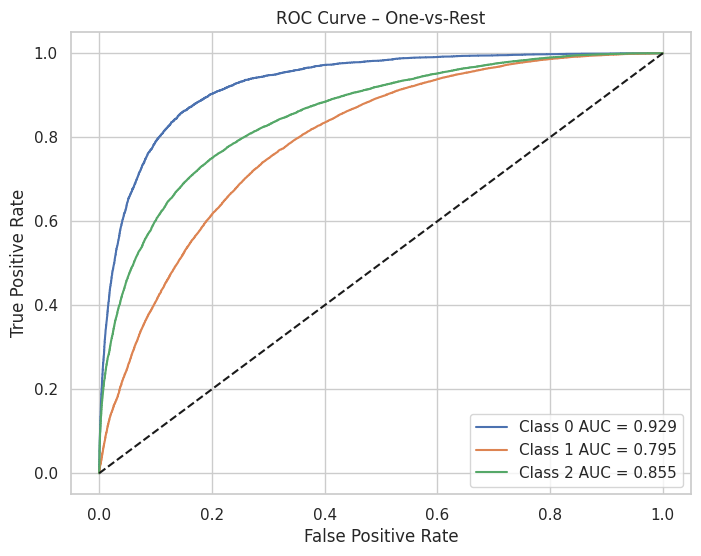

In [ ]:
# 18) ROC-AUC CURVE

y_score = best_model.predict_proba(X_input_test)

Y_test_bin = label_binarize(Y_test, classes=[0, 1, 2])
n_classes = Y_test_bin.shape[1]

plt.figure(figsize=(8, 6))

for i in range(n_classes):
    fpr, tpr, _ = roc_curve(Y_test_bin[:, i], y_score[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"Class {i} AUC = {roc_auc:.3f}")

plt.plot([0, 1], [0, 1], "k--")
plt.title("ROC Curve – One-vs-Rest")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid(True)
plt.show()




The ROC–AUC analysis shows strong class discrimination across all damage levels. The model achieved excellent performance for low damage (AUC = 0.929) and strong performance for high damage (AUC = 0.855), while medium damage (AUC = 0.795) showed slightly lower separation due to class overlap. Overall, the curves remain well above the random baseline, confirming reliable predictive capability.

# 21) CONFUSION MATRIX OF BEST MODEL


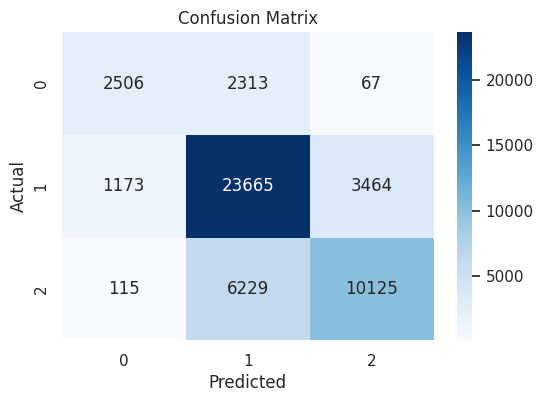

In [ ]:
# Plot the confusion matrix of the best-performing model

cm = confusion_matrix(Y_test, best_model.predict(X_input_test))

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()




The confusion matrix shows that the model correctly classifies most buildings across all damage levels, with strong diagonal dominance. Misclassifications mainly occur between adjacent classes (low–medium and medium–high), while extreme errors between low and high damage are rare. This behavior aligns with the low ordinal error and indicates risk-aware predictions, making the model suitable for earthquake damage assessment and prioritization

# 22) FEATURE IMPORTANCE ANALYSIS


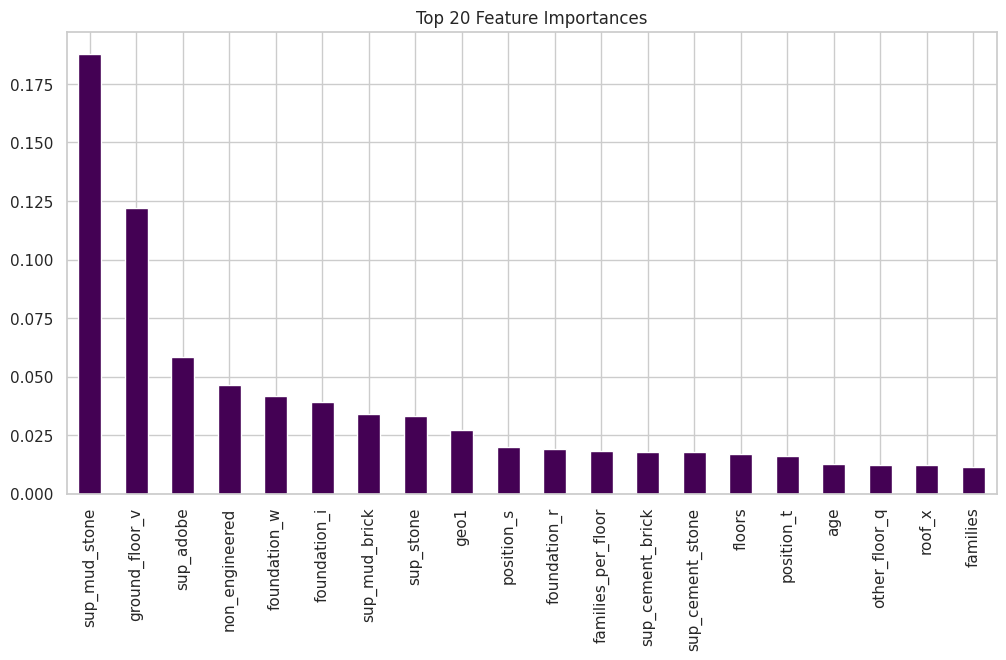

In [ ]:
# Feature importance for any model (base or tuned)
if hasattr(best_model, "feature_importances_"):
    feat_imp = pd.Series(best_model.feature_importances_, index=X.columns)

elif hasattr(best_model, "best_estimator_") and hasattr(best_model.best_estimator_, "feature_importances_"):
    feat_imp = pd.Series(best_model.best_estimator_.feature_importances_, index=X.columns)

else:
    feat_imp = None

if feat_imp is not None:
    feat_imp.nlargest(20).plot(kind='bar', figsize=(12,6), colormap='viridis')
    plt.title("Top 20 Feature Importances")
    plt.show()
else:
    print("Feature importance not available for this model.")


The feature importance analysis indicates that construction material and structural characteristics are the most influential factors in predicting earthquake damage. Features related to weak materials such as mud, stone, and adobe, along with non-engineered construction and vulnerable ground-floor types, show the highest importance. Foundation characteristics and geographic location also contribute meaningfully, while features such as age, number of floors, and family count play a secondary role. Overall, the importance ranking aligns well with structural engineering knowledge, confirming that the model captures realistic earthquake vulnerability patterns.

#WHY XGBOOST TUNED SCORED HIGH ?
XGBoost with hyperparameter tuning achieved the highest performance because it effectively models complex non-linear relationships and focuses learning on difficult samples through gradient boosting. The tuned parameters improved generalization by controlling model complexity and reducing overfitting, which resulted in higher weighted F1-score, lower ordinal misclassification error, and stable cross-validation performance. This makes XGBoost particularly well-suited for large, imbalanced, and high-dimensional earthquake damage data.

#Techniques Used:

Data Preprocessing: Removed unnecessary columns, handled duplicates, and treated outliers to improve data quality.

Exploratory Data Analysis (EDA): Used visualizations to understand feature distributions, class imbalance, and relationships with damage levels.

Feature Engineering: Created meaningful features such as engineered vs non-engineered buildings and families-per-floor ratio.

Categorical Encoding & Scaling: Applied one-hot encoding and feature scaling to prepare data for machine learning models.

Class Imbalance Handling: Used SMOTE to balance damage classes and improve prediction of severe damage cases.

Machine Learning Models: Trained ensemble models including Random Forest, LightGBM, XGBoost, and CatBoost.

Hyperparameter Tuning: Used RandomizedSearchCV to optimize model performance efficiently.

Model Evaluation: Evaluated models using accuracy, weighted F1-score, ROC-AUC, confusion matrix, and ordinal error.

Model Selection: Selected the best model based on performance, stability, and suitability for real-world deployment.

#CHALLENGES FACED
1. Highly Imbalanced Target Classes
The damage classes (low, medium, high) were unevenly distributed, with medium damage dominating the dataset.
This caused the initial models to be biased toward predicting medium damage.
SMOTE oversampling was required to balance the training dataset.
2. Large Dataset Size & High Memory Usage
With 260,000+ rows and 100+ features after one-hot encoding, the dataset became computationally heavy.
This led to:
- Slow model training
- High RAM usage
- Longer hyperparameter tuning times
Some algorithms required scaling-down samples for EDA (e.g., pairplots).
3. Presence of Outliers in Key Variables
Columns like age, area_percentage, and height_percentage contained extreme values.
These outliers caused unstable training and affected model performance until IQR-based capping was applied.
4. Multicollinearity in Engineered Features & One-Hot Variables
Many dummy variables were perfectly correlated, especially superstructure material flags and secondary-use categories.
Although tree models can handle this, it made statistical diagnostics (like VIF) less interpretable.
5. Variation in Model Requirements (Scaling vs Non-Scaling)
Different algorithms had different preprocessing requirements:
- XGBoost → needed feature scaling
- CatBoost → required raw categorical-friendly data
- LightGBM & RandomForest → no scaling needed
Managing separate training pipelines increased project complexity.
6. Long Hyperparameter Tuning Time
Tuning LightGBM, XGBoost, and CatBoost with RandomizedSearchCV was computationally expensive due to:
- High-dimensional feature space
- Large sample size
- Multiple CV folds
Some tunings took several minutes per model.
7. Difficulty in Interpreting Damage Patterns Across Locations
The geo features (geo1, geo2, geo3) had thousands of levels, making interpretation challenging.
Although important to model performance, region-level insights required careful sampling and visualization.
8. Overlapping Patterns Between Low & Medium Damage
The confusion matrix showed that low and medium classes were often confused.
This indicates structural similarities in buildings before the earthquake, making it harder to differentiate them purely based on the available features.
10. Balancing Model Accuracy vs Interpretability
Tree-based boosting models (XGBoost, LGBM, CatBoost) produced strong performance, but their complexity made:
- Feature importance harder to interpret
- Model decisions less transparent
- Real-world recommendations less straightforward

#23)CONCLUSION

The tuned **XGBoost** model achieved an accuracy of **73.09%** and a weighted F1-score of 0.73, indicating balanced predictive performance across all earthquake damage classes. The low mean ordinal error of 0.273 confirms that most misclassifications occur between adjacent damage levels rather than extreme categories, which is essential for risk-sensitive disaster assessment. Cross-validation further validated the model’s robustness, yielding a mean F1-score of 0.79 across five folds, demonstrating strong generalization capability. Overall, these results confirm that the tuned XGBoost model provides a stable, reliable, and practical solution for large-scale earthquake damage prediction and disaster-response planning.